In [1]:
# importing basic data analysis librarires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling

# libraries for data preparation
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# import model and feature selection libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


# importing metrics and model validation libraries
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestClassifier

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

## **Problem Statement and Approach**

### **Understanding the problem and Objectives**

1. X Education wishes to identify the most potential leads, also known as ‘Hot Leads’, to increase the conversion rate from current 30% to above 80%. 


2. Based on the above business problem statement, the objective of the exercise is to build a model and assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance.


3. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### **Approach and Analysis**

**The approach followed is mentioned below along with the links for the relevant portions :**

<a href='#I'>**1. Importing the dataset, Data cleaning and preparation**</a>
1. Importing the country dataset and understanding the structure of the dataset
2. Data Cleaning - Identifying nan values and unique values in each columns
3. Checking Data Imbalance, Identifying data issues with the columns if any and treating suitably


<a href='#II'>**2. EDA - Inferences from the Data**</a>
1. Univariate and Bi-variate Analysis for Numerical columns
2. Univariate and Bi-variate Analysis for Categorical Columns

<a href='#III'>**3. EDA and Data Preparation for the Model**</a>
1. Treating Nan values for numerical columns and dropping some columns based on EDA/nan values
2. Treating nan values of categorical columns and dropping some columns based on nan values and EDA
3. Removing Unique columns and creation/modifying existing columns based on EDA
4. Converting Categorical Columns suitably for the model
5. Splitting the data into Train and Test Datasets
6. Scaling the data for Numerical columns


<a href='#IV'>**4. Modelling the data using Logistic Regression**</a> 
1. Initiating the stats model for understanding and creating functions for repeated evaluation
2. Using RFE to select 20 important variables
3. Iterating through various models and dropping variables based on p value and vif
3. Finalizing the model parameters

<a href='#V'>**5. Model Evaluation and K-Cross validation on the train data set**</a>
1. Identifying important metrics accuracy score, Sensitivity, specificity, precision and recall scores for the business objective
2. Bulding roc_curve, precision_recall curve
3. Precision vs Recall trade off Selecting the threshold probability cut-off for precision score based on the business objective
4. Updating the model with threshold probability chosen
5. K-cross Validation on the train dataset

<a href='#VI'>**6. Evaluating the model on the test Dataset**</a>
1. Test data preparation for the model
2. Evaluating the model on the test data-set
3. Identifying key metrics for checking the performance of the model on the test dataset


<a href='#VII'>**7. Assigning lead score for each lead and Final Recommendations**</a>

1. Interpretation of the model obtained through logistic regression and impact of various variables
2. Leads score formula for each lead and cut-off to identify as hot lead
3. Feature importance using Random Forrest Classifier


*****

## 1. Importing the dataset, Data cleaning and preparation <a id='I'></a>

###  1.1 Importing the country dataset and understanding the structure of the dataset

In [2]:
# importing the dataset
# the dataset file (Leads.csv) need to kept in the same folder as this notebook 
leads_df = pd.read_csv('Leads.csv')

In [3]:
# checking out the dataframe
leads_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# understanding the shape of the dataframe
leads_df.shape

(9240, 37)

**Inference:** we have 9240 rows and 37 columns

In [5]:
# identifying unique values in each column
leads_df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

**Inference:** both ProspectID and Lead Number are the unique IDs of the dataset

In [6]:
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

###  1.2 Data Cleaning - Identifying nan values and unique values in each columns

In [7]:
# Checking the unique values of each colum
cols = list(leads_df.columns)

cols.remove('Prospect ID')
cols.remove('Lead Number')

for col in cols:
    print("____________________________________________________")
    print(col)
    print("____________________________________________________")
    print(leads_df[col].value_counts())
    print("____________________________________________________")

____________________________________________________
Lead Origin
____________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
____________________________________________________
____________________________________________________
Lead Source
____________________________________________________
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
testone                 1
WeLearn                 1
Pay per Click Ads       1
blog                    1
NC_EDM                  1
welearnblog_Home        1

In [8]:
# There are select in various categorical variables. Replacing them with nan as no data provided by customers
leads_df = leads_df.replace('Select', np.nan)

# identifying null values
round((leads_df.isnull().sum())/len(leads_df)*100,1)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.4
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.5
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.5
Last Activity                                     1.1
Country                                          26.6
Specialization                                   36.6
How did you hear about X Education               78.5
What is your current occupation                  29.1
What matters most to you in choosing a course    29.3
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

**Understanding the data:**

1. Prospect ID - unique values, No nan values, no select 
2. Lead Number - unique values, No nan values, no select
3. Lead Origin - no nan values
3. Lead Source - 21 unique values, 36 (0.4%) nan values, no select
4. Do Not Email - y/n, no nan values, no select
5. Do Not Call - y/n, no nan values, no select
6. Converted - 0/1, no nan values, no select
7. Total visits - number, 137 nan values(1.5%), no select
8. Total time spent on website - mins or secs
9. page views per visit - 137 nan values (1.5%) no select 
10. last activity - 17 unique values, 103 (1.1%) nan values
11. Country - 2461 nan values, 26.6% nan values
12. specialization, select - 1942 values, 15.6% nan valeues
13. hear about X education - select - 5400 values, 23.9 % nan values
14. Current occupation - 29% nan values
15. What matters most to you in choosing a course - 29% nan values
16. search  - yes/no - no nan values (very less yes values - 14)
17. magazine - no - no nan values (no yes values
18.  Newspaper Articles - yes/no no nan values( 2 yes values)
19. X education forums - y/no (1 yes value)
20. News paper - y/n (1 yes values)
21. Dig Adv. - y/n (4 yes values)
22. Recommendations - y/n (7 yes values)
23. Receive more update about course - no - (no yes values)
24. Tags - 36% nan values
25. Lead quality - 51.6% nan values
26. supply chain content - no
27. DM content - no
28. Lead Profile - 29 % nan values, select
29. city - 15% nan values, select
30. Asymmetrique Activity Index - 45.6% nan values
31. Asymmetrique Profile Index - 45.6% nan values
32. Asymmetrique Activity Score - 45.6% nan values
33. Asymmetrique Profile Score  - 45.6% nan values
34. I agree to pay the amount through cheque - no
35. A free copy of Mastering The Interview  - yes/no
36. Last Notable activity no nan values

### 1.3 Checking Data Imbalance, Identifying Data Issues & categorizing numerical and object columns

In [9]:
# Data imbalance check
round(leads_df['Converted'].sum()/len(leads_df)*100,2)

38.54

**Inference:** Since the conversion rate in the data set is 38.54%. The data is balanced.

In [10]:
# Identified the following columns to remove based on no variation (have more than 99% single value)
cols_toremove = ['I agree to pay the amount through cheque', 'Get updates on DM Content', 'Update me on Supply Chain Content',
                'Receive More Updates About Our Courses', 'Digital Advertisement', 'Newspaper', 'X Education Forums', 'Newspaper Article',
                 'Magazine', 'Do Not Call', 'Through Recommendations', 'Search']

len(cols_toremove)

12

In [11]:
# Checking the value counts in each of these columns
for col in cols_toremove:
    print(leads_df[col].value_counts())

No    9240
Name: I agree to pay the amount through cheque, dtype: int64
No    9240
Name: Get updates on DM Content, dtype: int64
No    9240
Name: Update me on Supply Chain Content, dtype: int64
No    9240
Name: Receive More Updates About Our Courses, dtype: int64
No     9236
Yes       4
Name: Digital Advertisement, dtype: int64
No     9239
Yes       1
Name: Newspaper, dtype: int64
No     9239
Yes       1
Name: X Education Forums, dtype: int64
No     9238
Yes       2
Name: Newspaper Article, dtype: int64
No    9240
Name: Magazine, dtype: int64
No     9238
Yes       2
Name: Do Not Call, dtype: int64
No     9233
Yes       7
Name: Through Recommendations, dtype: int64
No     9226
Yes      14
Name: Search, dtype: int64


In [12]:
# removing these cols as they dont include any variance
leads_df = leads_df.drop(cols_toremove, axis = 1)
leads_df.shape

(9240, 25)

In [13]:
# identifying numeric cols and categorical cols of the dataset
num_cols = list(leads_df.select_dtypes(include = 'number').columns)
obj_cols = list(leads_df.select_dtypes(include = 'object').columns)
print('Numeric columns: '+str(len(num_cols)))
print('Categorical columns: '+str(len(obj_cols)))

Numeric columns: 7
Categorical columns: 18


## 2. Exploratory Data Analysis <a id='II'></a>

### 2. 1 Univariate and Bi-variate Analysis for Numerical columns

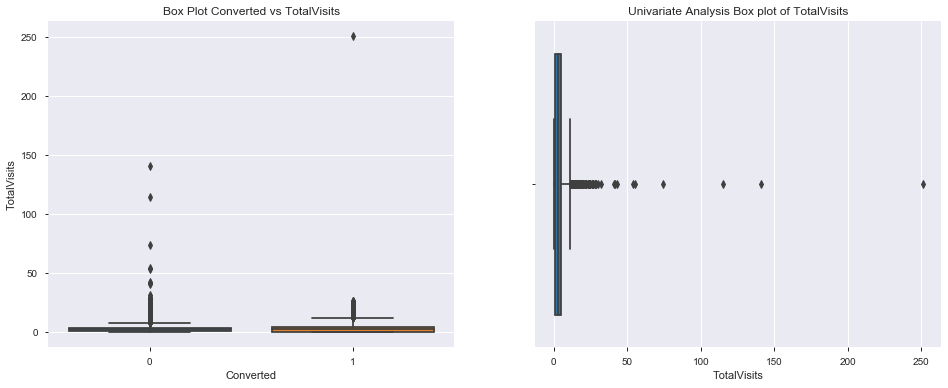

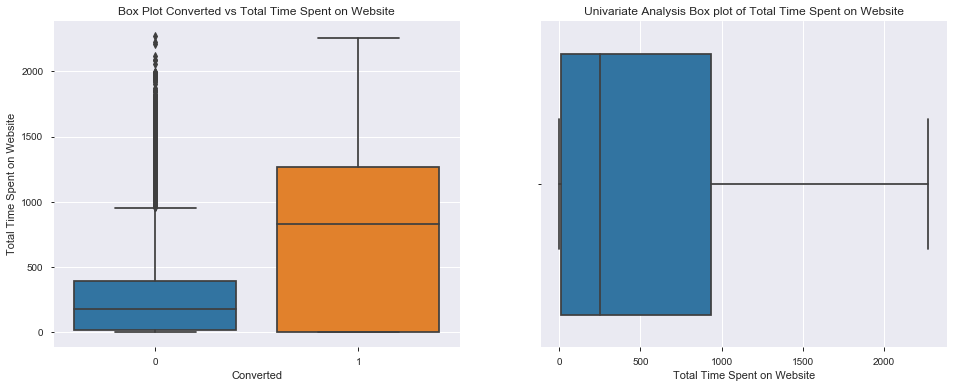

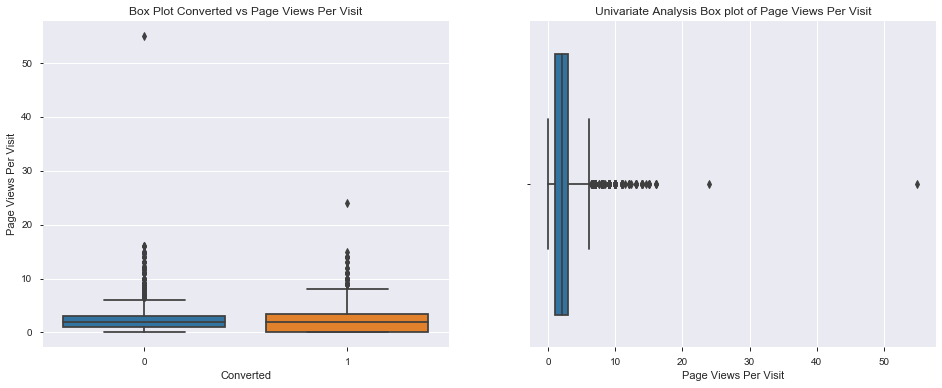

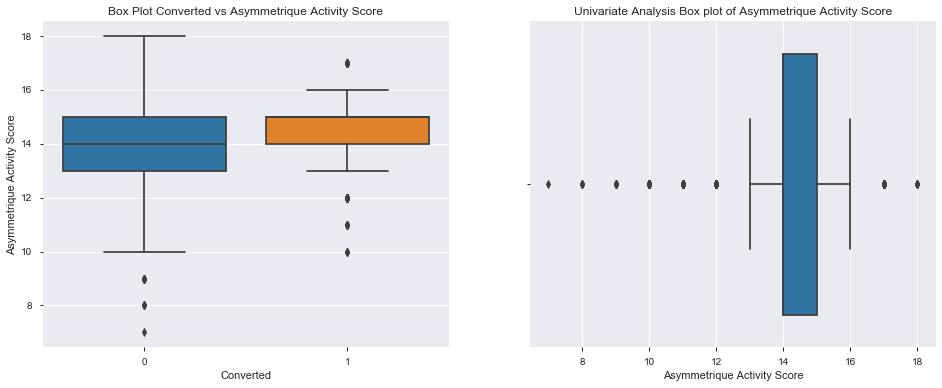

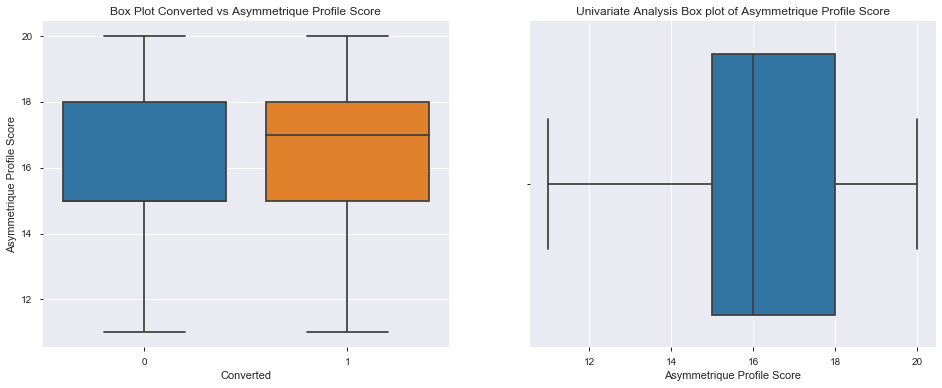

In [14]:
# creating a function for univariate and bi-variate analysis for Numerical columns
def numplot(df, col):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (16,6))
    
    sns.boxplot(x = 'Converted',y = col, data = df, ax = ax1)
    ax1.set_title('Box Plot Converted vs ' + col)
    
    sns.boxplot(df[col], ax = ax2)
    ax2.set_title('Univariate Analysis Box plot of ' + col)

for colum in num_cols:
    if colum not in ['Lead Number', 'Converted']:
        numplot(leads_df, colum)

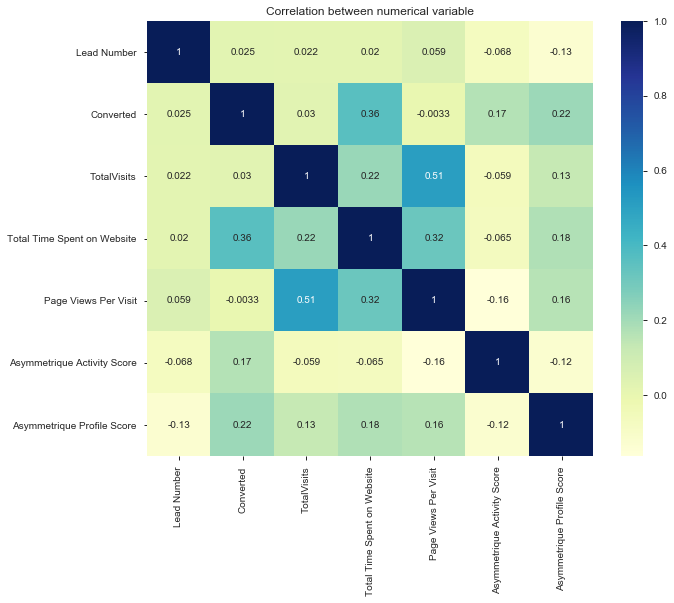

In [15]:
# Bi-variate analysis based on correlation

plt.figure(figsize = (10,8))
sns.heatmap(leads_df[num_cols].corr(), cmap = 'YlGnBu', annot = True)
plt.title('Correlation between numerical variable')
plt.show()

In [16]:
# Checking the percentile of converted and non-converted
leads_num = leads_df[num_cols]
leads_num1 = leads_num[leads_num['Converted'] == 1]
leads_num0 = leads_num[leads_num['Converted'] == 0]

df1 = leads_num0.describe(percentiles = [0,0.05,0.1, 0.25,0.5,0.75,0.9,0.95,1])
df2 = leads_num1.describe(percentiles = [0,0.05,0.1, 0.25,0.5,0.75,0.9,0.95,1])

pd.concat([df1,df2], axis = 1)

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,5679.000000,5679.0,5642.000000,5679.000000,5642.000000,3114.000000,3114.000000,3561.000000,3561.0,3461.000000,3561.000000,3461.000000,1908.000000,1908.000000
mean,616722.197570,0.0,3.329670,330.404473,2.368453,14.123956,16.035003,617931.981185,1.0,3.633632,738.546757,2.353638,14.603774,16.850629
std,23779.666878,0.0,4.359668,432.231915,2.175058,1.592037,1.672051,22780.974851,0.0,5.564011,615.656010,2.139276,0.884657,1.913772
min,579545.000000,0.0,0.000000,0.000000,0.000000,7.000000,11.000000,579533.000000,1.0,0.000000,0.000000,0.000000,10.000000,11.000000
0%,579545.000000,0.0,0.000000,0.000000,0.000000,7.000000,11.000000,579533.000000,1.0,0.000000,0.000000,0.000000,10.000000,11.000000
5%,582776.800000,0.0,0.000000,0.000000,0.000000,11.650000,13.000000,583055.000000,1.0,0.000000,0.000000,0.000000,13.000000,14.000000
10%,585933.200000,0.0,0.000000,0.000000,0.000000,12.000000,14.000000,587146.000000,1.0,0.000000,0.000000,0.000000,14.000000,15.000000
25%,595729.000000,0.0,1.000000,16.000000,1.000000,13.000000,15.000000,598110.000000,1.0,0.000000,0.000000,0.000000,14.000000,15.000000
50%,614218.000000,0.0,3.000000,179.000000,2.000000,14.000000,15.000000,617035.000000,1.0,3.000000,832.000000,2.000000,15.000000,17.000000
75%,637381.500000,0.0,4.000000,393.000000,3.000000,15.000000,18.000000,637409.000000,1.0,5.000000,1268.000000,3.500000,15.000000,18.000000


**Inferences for Numerical Columns**

1. The `Converted` column is correlated with `Total time spent on website`.
2. The `Converted` column is slightly correlated with `Asymmetrique Activity Score`, `Asymmetrique Profile Score`.
3. `Page Views Per Visit`,  `Total time spent on website` and `Total Visits` are correlated with each other
4. Outliers observed in `TotalVisits` and `Page Views Per Visit`
5. From the bivariate analysis with `Converted` column, `Total time spent on website` could be an important column which means the more time the customer spend on the website, the more chance he will be converted

### 2.2 Univariate and Bi-variate Analysis for Cateogrical Columns

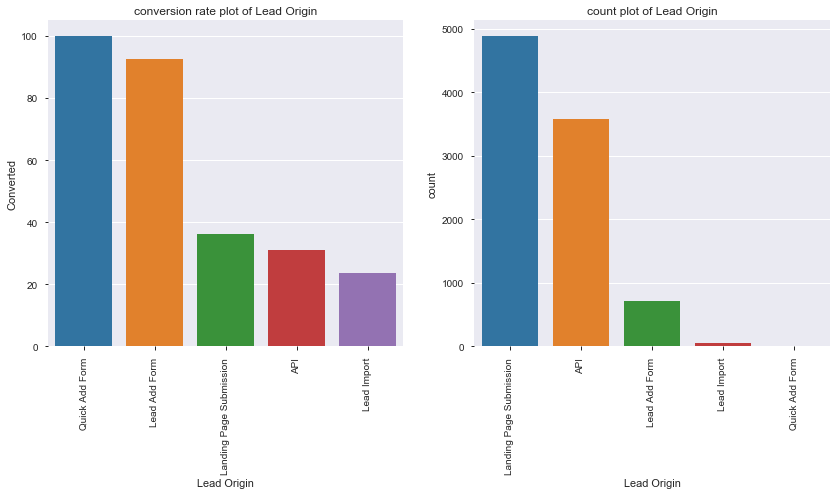

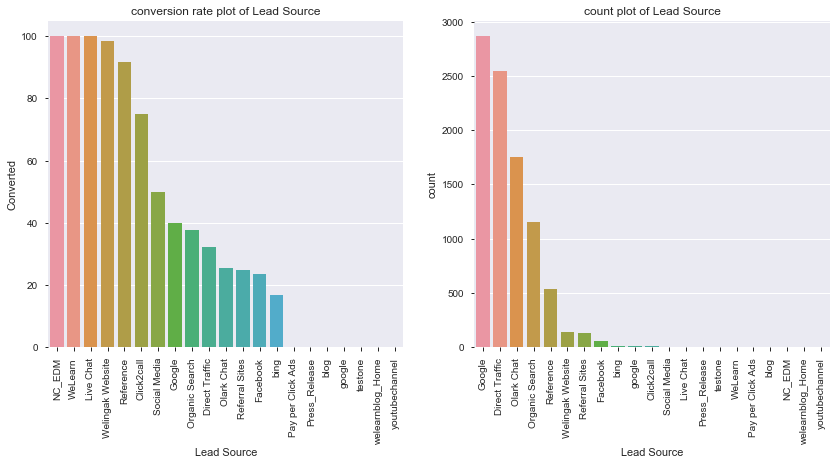

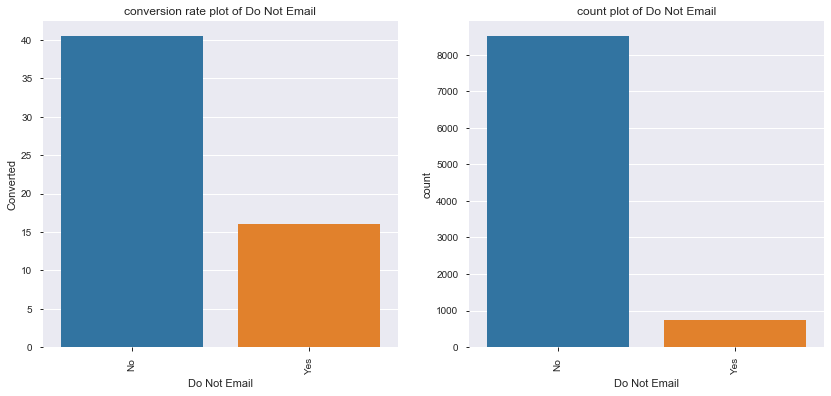

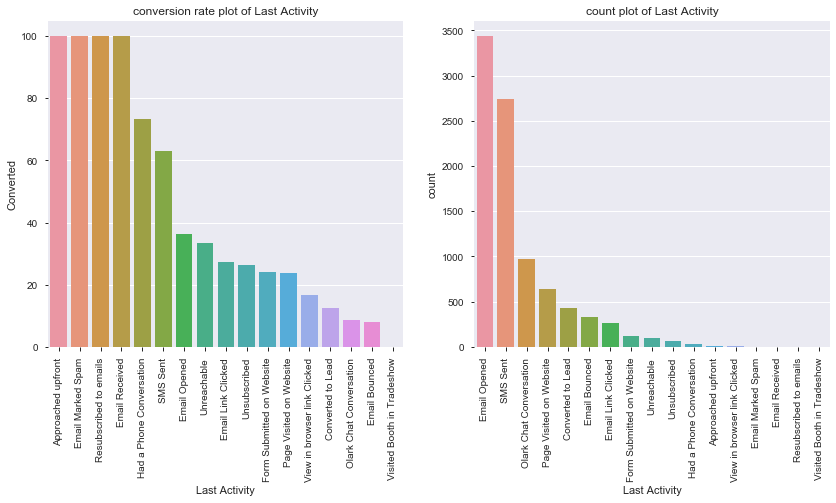

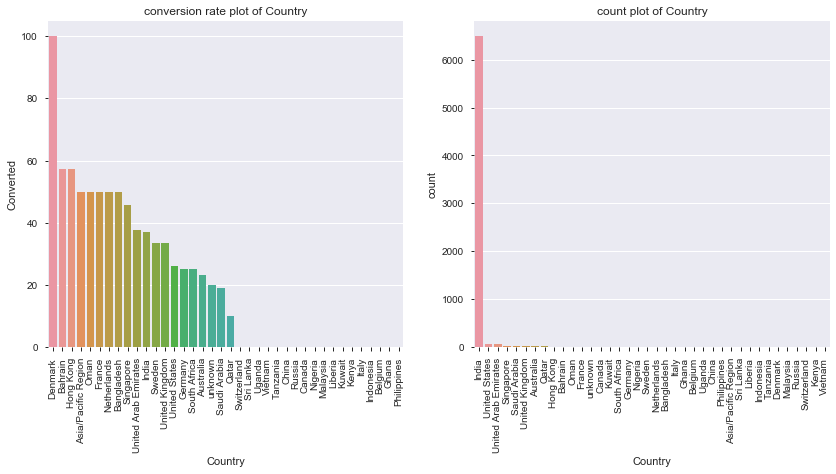

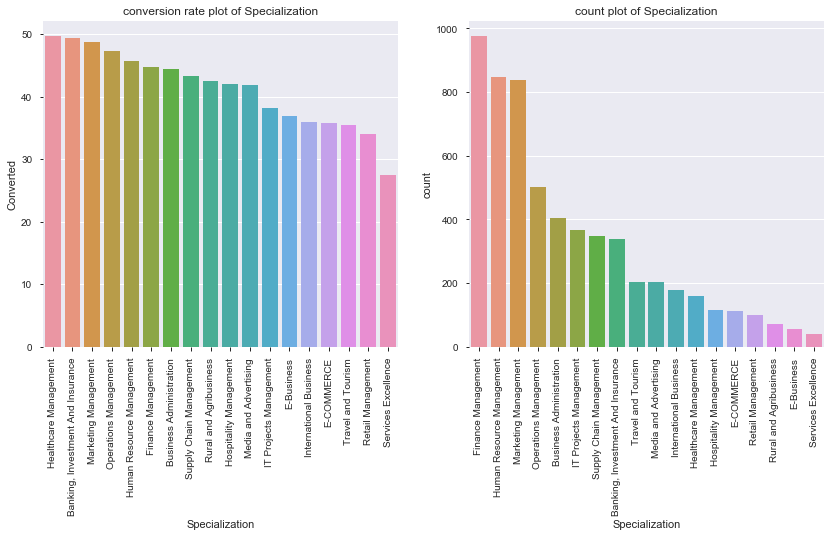

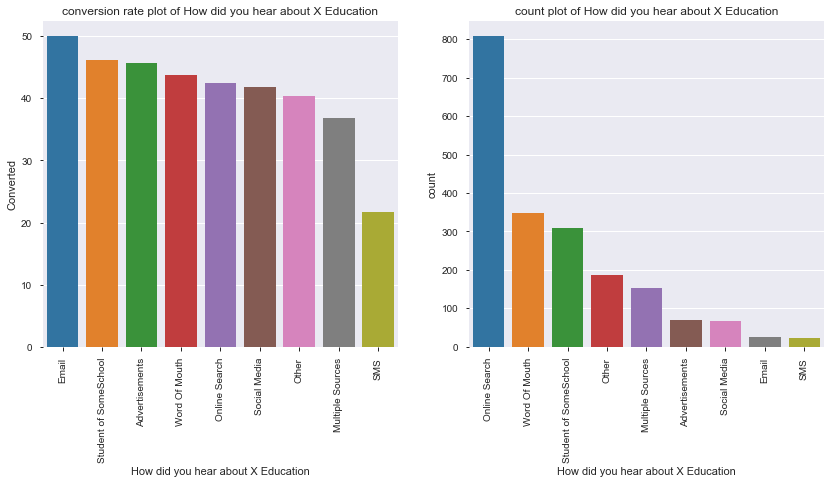

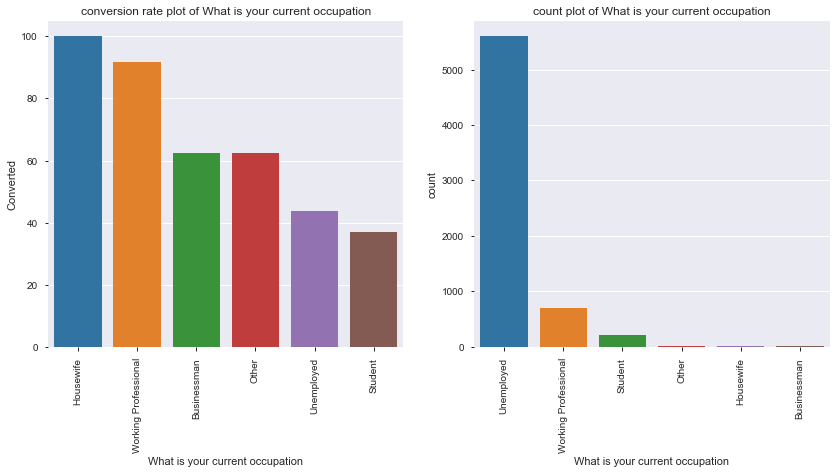

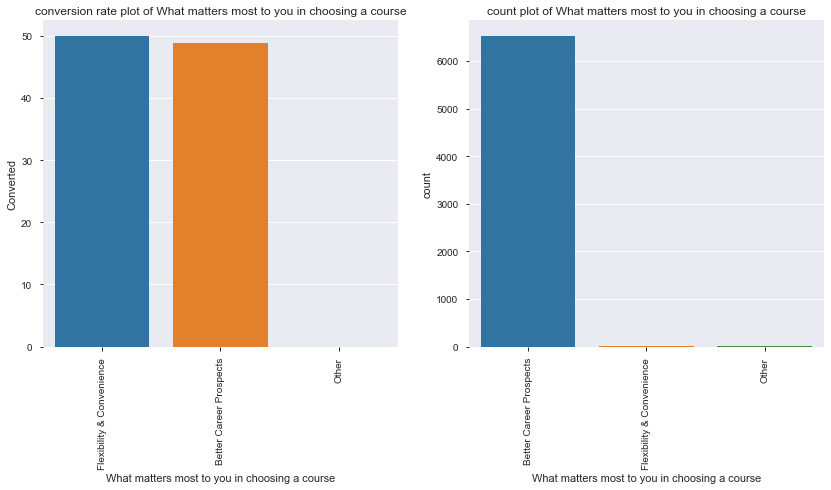

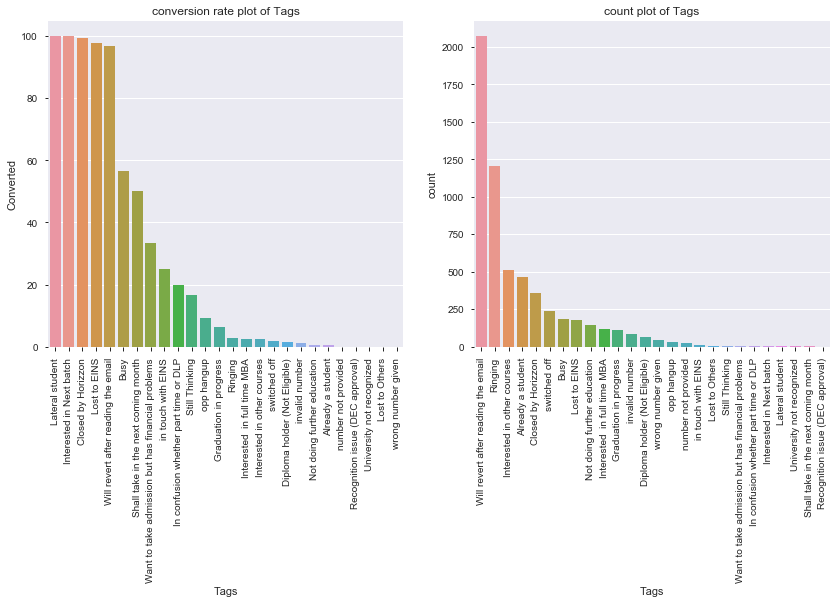

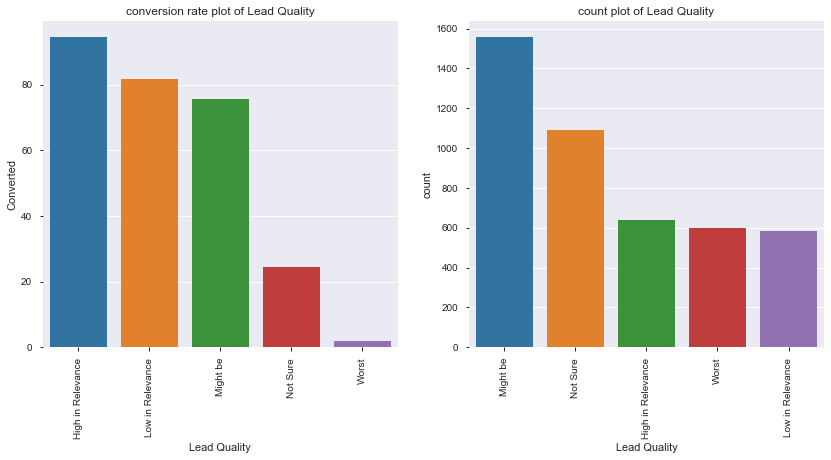

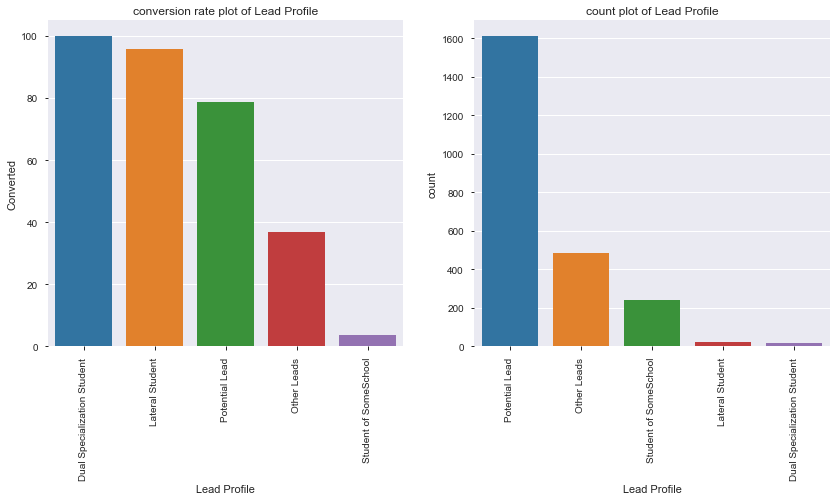

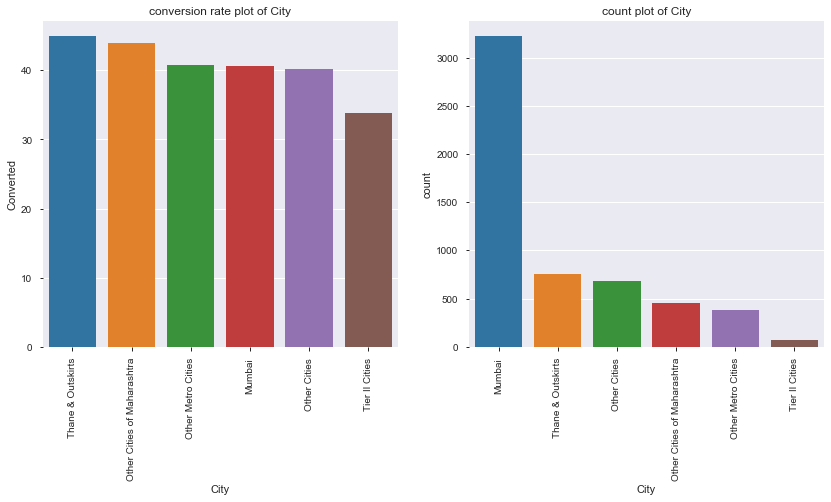

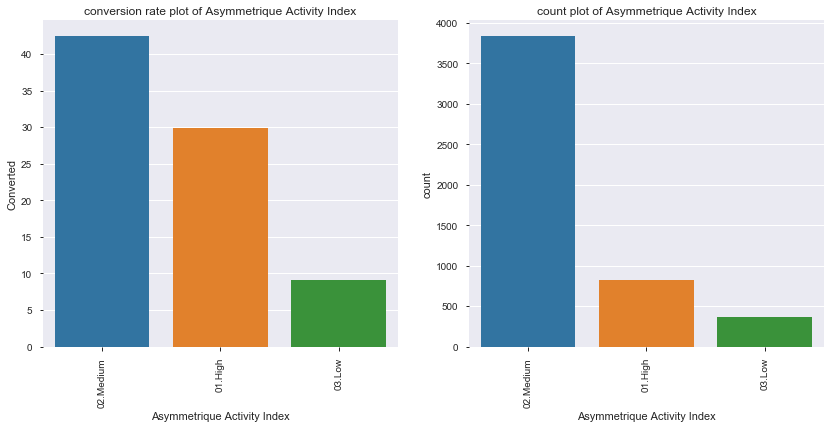

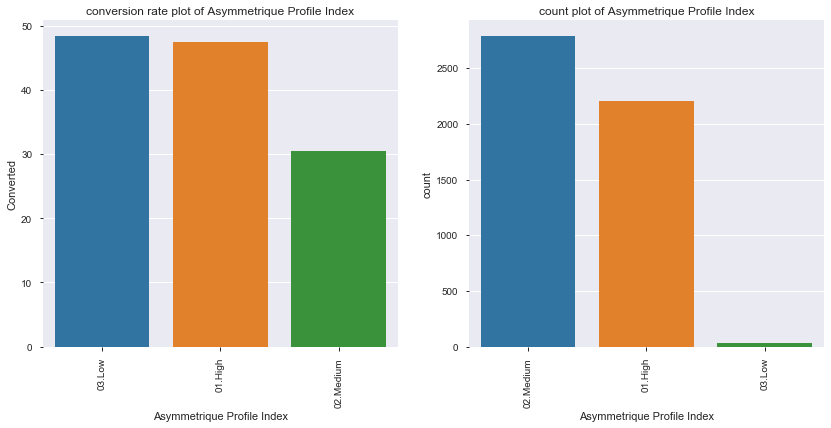

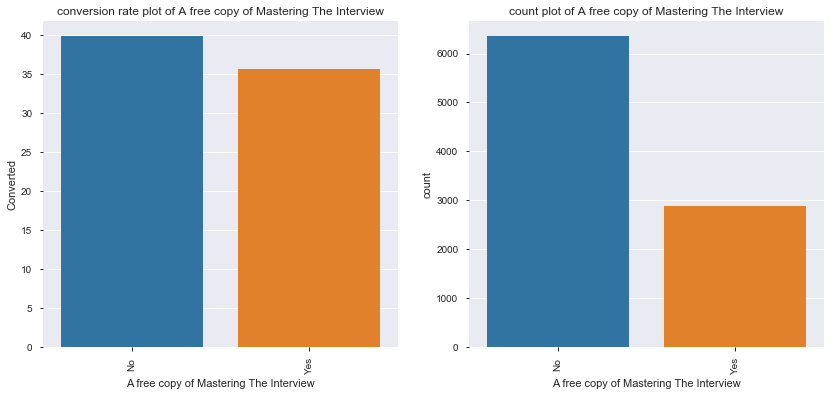

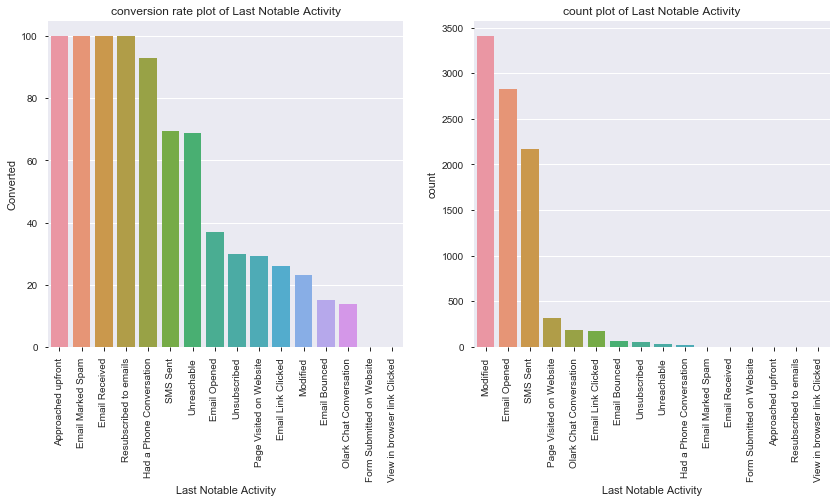

In [17]:
# appending 'Converted' to object _columns
obj_cols.append('Converted')


# creating a function for visualization of category columns 
def catplot(df, col):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (14,6))
    
    # countplots for each unique value in columns
    sns.countplot(col, data = df, ax = ax2, order = df[col].value_counts().index)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
    ax2.set_title('count plot of '+ col)
    
    # plots for conversion rate for each unique value in column
    dummy = pd.DataFrame(df.groupby(col).mean()['Converted']*100).reset_index()
    dummy = dummy.sort_values('Converted', ascending = False)
    sns.barplot(x = dummy[col], y = dummy['Converted'], ax = ax1)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
    ax1.set_title('conversion rate plot of '+col)

# univariate and bi-variate analysis of category columns
for colum in obj_cols:
    if colum not in ["Prospect ID", 'Converted']:
        catplot(leads_df, colum)

**Inferences for Categorical Columns**:

1. Lots of categories in `Lead Source`, `Last Activity`, `Country`, `Tags` which doesn't have much value counts. This needs to be addressed

2. Based on the conversion rate and count plots. Some of the important categories that can impact the conversion rate are
    1. Lead Origin : `Lead Add Form`(Increase), `API` (decrease)
    2. Lead Source : `Welingak Website`(Increase), `Reference`(Increase), `Facebook` (decrease), `Bing`(decrease)
    3. Dont Email: `Yes` (decrease)
    4. Last Activity: `SMS Sent` (increase), `Olar Chat Conversation`(Increase), `Page Visited on Website` (decrease)
    5. Country (Not much Impact)
    6. Specialization (Not Much Impact)
    7. How did you hear about X Education : No Impact
    8. Conversion rate plot of what is your occupation: `Working Professional`(Increase)
    9. What Matters to you in choosing a course: `Better Career Prospects` (Increase)
    10. Tags : `Closed b Horizzon` (Increase), `Lost to EINS` (Increase), `Will revert after reading the email` (Increase),  `Busy` (increase ) etc.
    11. Lead quality: `High in relevance` (increase), `Low in relevance` (increase), `Might be` Increase
    12. Lead Profile: `Potential Lead` (increase)
    13. City: No impact
    14. Asymmetrique Activity Index : Low, Medium (decrease)
    15. Asymmetrique Profile Index : No impact
    16. A free copy of Mastering The Interview: No impact
    17. last Notable Activity: `Modified` (decrease)

## 3. EDA and Data Preparation for the Model <a id='III'></a>

### 3.1 Treating nan values for numeric columns

In [18]:
round(leads_df[num_cols].isnull().sum()/len(leads_df)*100,1)

Lead Number                     0.0
Converted                       0.0
TotalVisits                     1.5
Total Time Spent on Website     0.0
Page Views Per Visit            1.5
Asymmetrique Activity Score    45.6
Asymmetrique Profile Score     45.6
dtype: float64

**Inferences:** 
1. we have 1.5% nan values in `TotalVisits` : these rows can be removed
2. we have 1.5% nan values in `Page Views Per Visit`: these rows can be removed
3. we have 45.6% nan values in `Asymmetrique Activity Score`: Lets evaluate this column further
4. we have 45.6% nan values in `Asymmetrique Profile Score `: Lets evaluate this column further


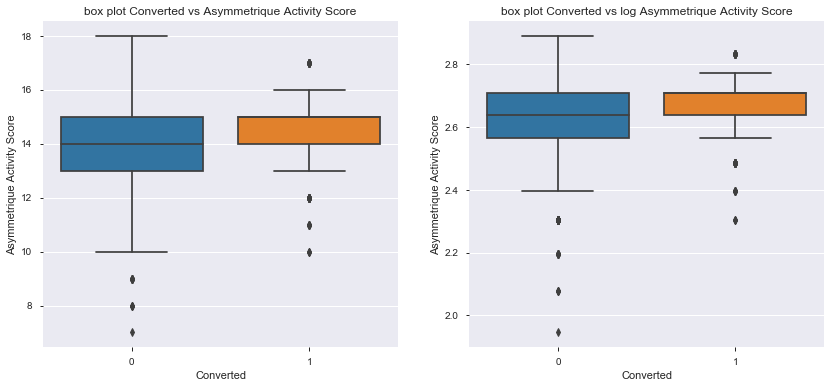

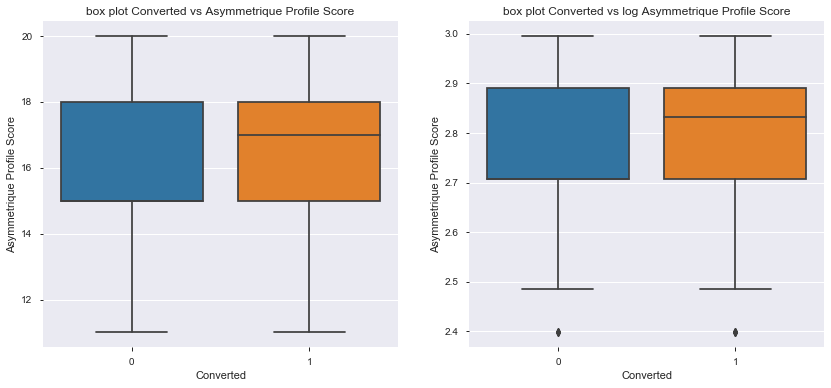

In [19]:
def numplot(df, col):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (14,6))
    
    sns.boxplot(x = 'Converted',y = col, data = df, ax = ax1)
    ax1.set_title('box plot Converted vs ' + col)
    
    sns.boxplot(x = df['Converted'], y = np.log(df[col]), ax = ax2)
    ax2.set_title('box plot Converted vs log ' + col)

# plot for Asymmetrique Activity Score
numplot(leads_df, 'Asymmetrique Activity Score')

# plot for Asymmetrique Activity Score
numplot(leads_df, 'Asymmetrique Profile Score')

**Inference:** we can safely remove these columns as these doesn't vary much with respect to `Converted` Column

In [20]:
# removing the cols having nan values in TotalVisits and Pageviewspervisit
for col in ['TotalVisits', 'Page Views Per Visit']:
    leads_df = leads_df[~leads_df[col].isnull()]

# dropping 'Asymmetrique Activity Score','Asymmetrique Profile Score' 
for col in num_cols:
    if col.find('Asymmetrique') != -1:
        leads_df = leads_df.drop(col, axis = 1)
        
# checking for nan values in num_cols
num_cols.remove('Asymmetrique Activity Score')
num_cols.remove('Asymmetrique Profile Score')

leads_df[num_cols].isnull().sum()

Lead Number                    0
Converted                      0
TotalVisits                    0
Total Time Spent on Website    0
Page Views Per Visit           0
dtype: int64

### 3.2 Treating nan values of categorical columns and dropping some cols based on nan values and EDA

In [21]:
leads_df[obj_cols].isnull().sum()/len(leads_df)*100

Prospect ID                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.318576
Do Not Email                                      0.000000
Last Activity                                     0.000000
Country                                          25.530045
Specialization                                   36.295727
How did you hear about X Education               78.150060
What is your current occupation                  29.473800
What matters most to you in choosing a course    29.682522
Tags                                             36.614303
Lead Quality                                     51.949907
Lead Profile                                     74.491926
City                                             39.547402
Asymmetrique Activity Index                      45.787103
Asymmetrique Profile Index                       45.787103
A free copy of Mastering The Interview            0.0000

In [22]:
# identifying object columns having nan values
null_obj_cols = leads_df[obj_cols].isnull().sum()/len(leads_df)*100
null_obj_cols = list(null_obj_cols[null_obj_cols > 0].index)

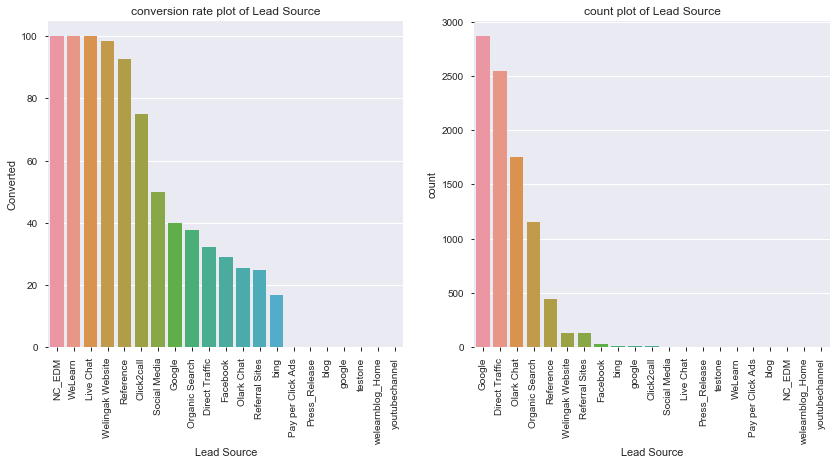

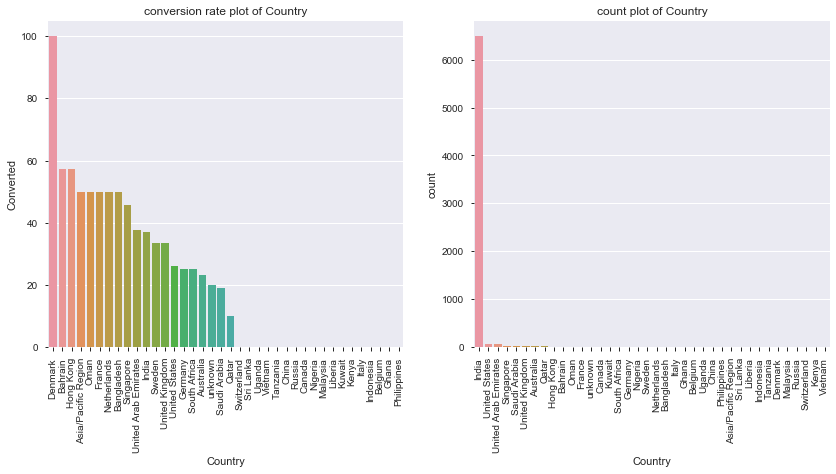

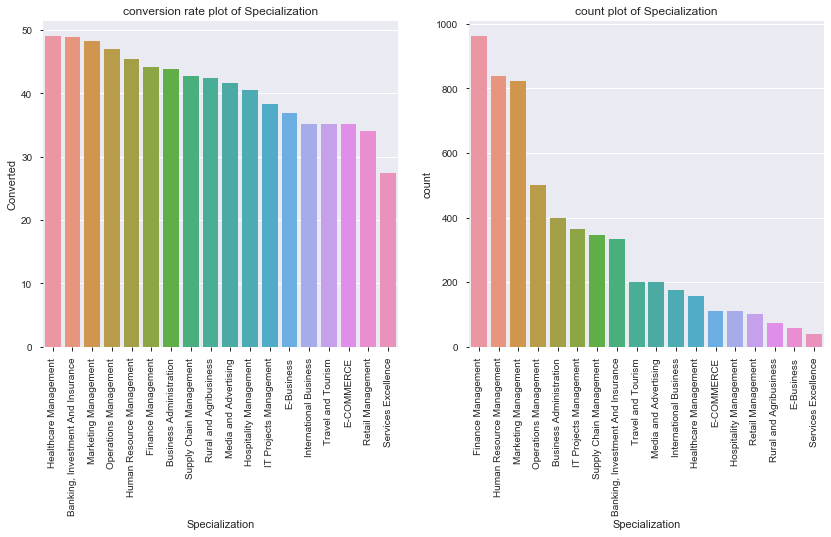

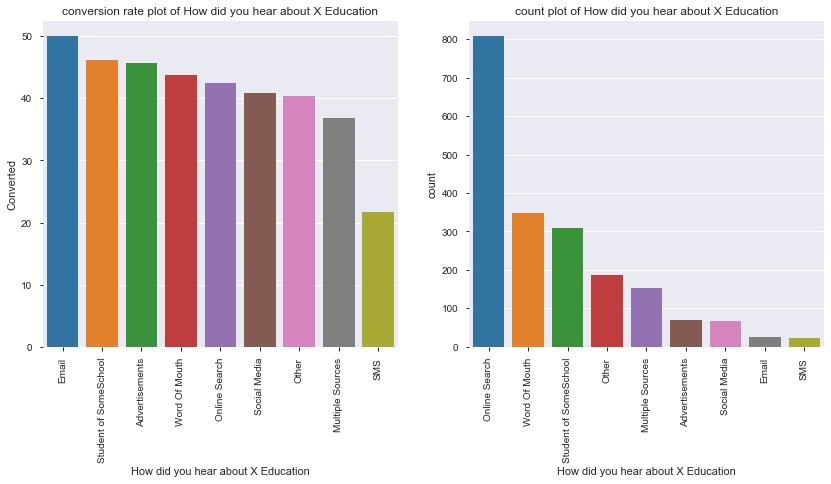

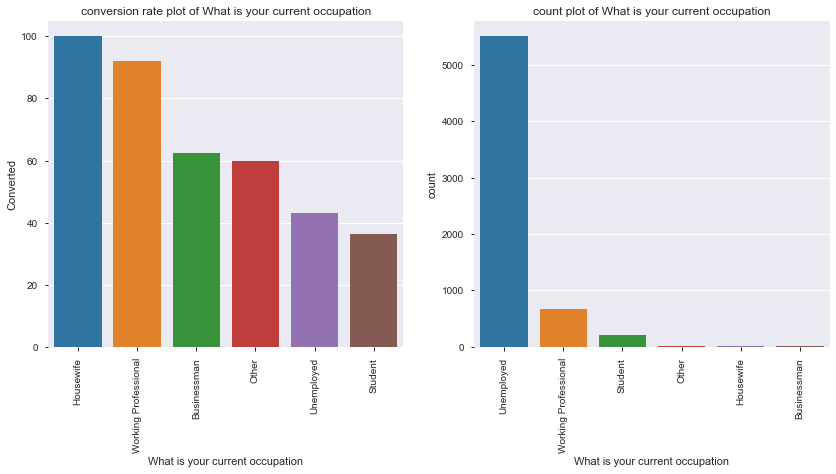

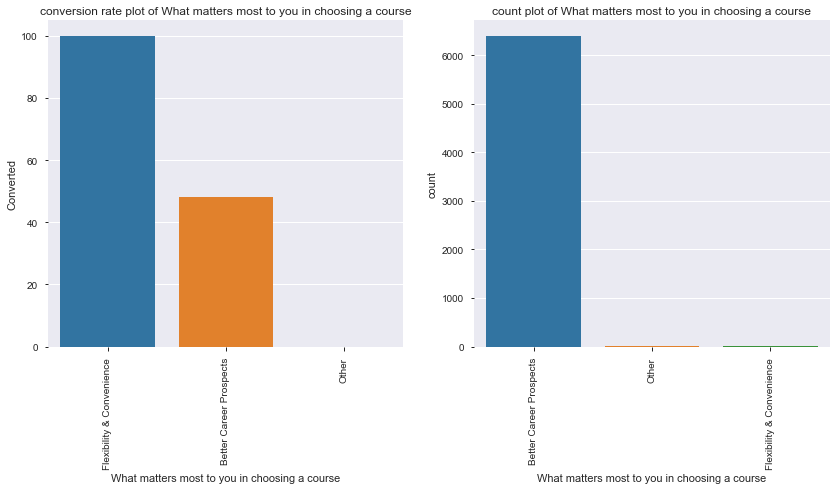

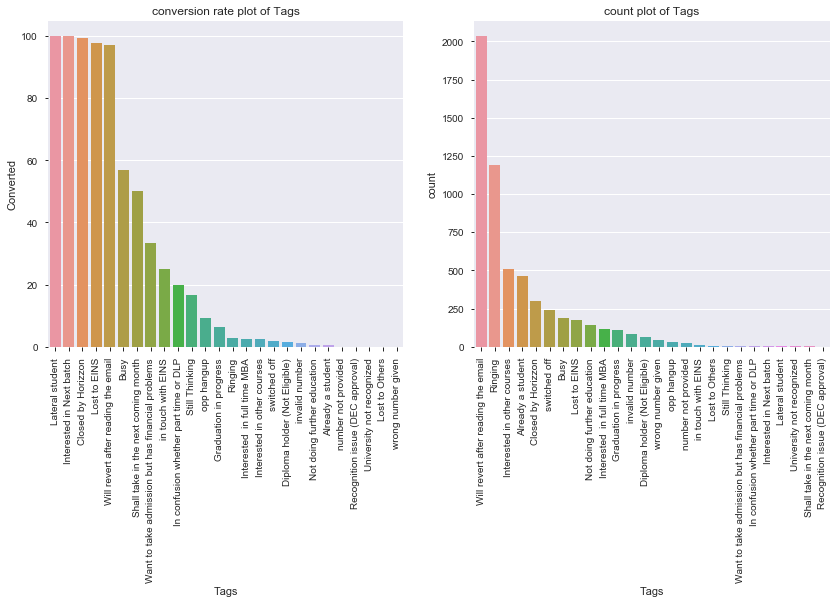

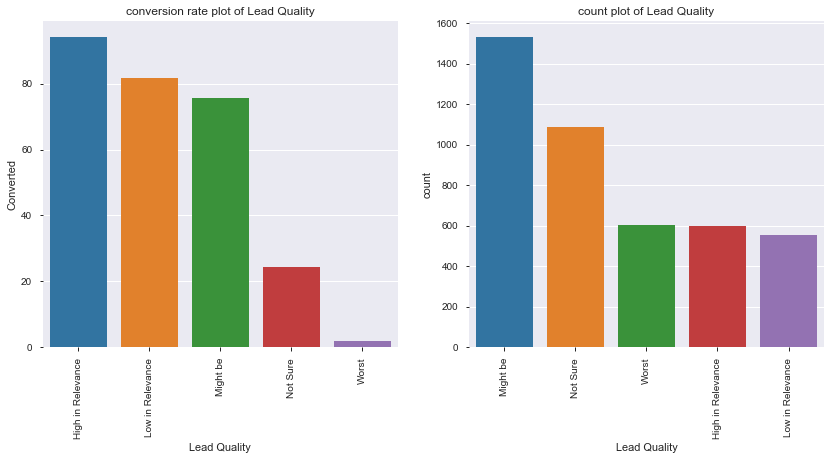

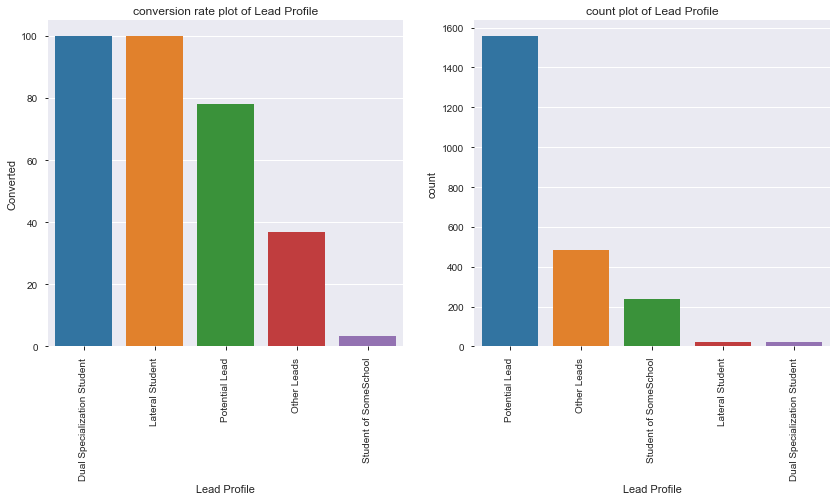

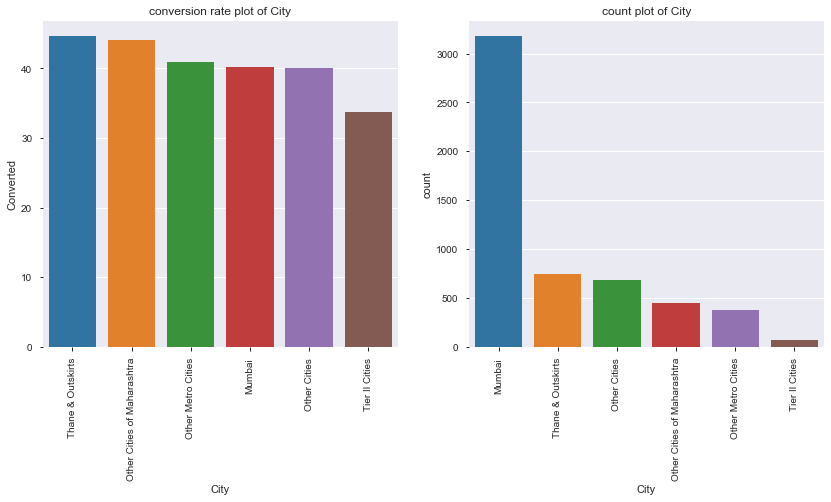

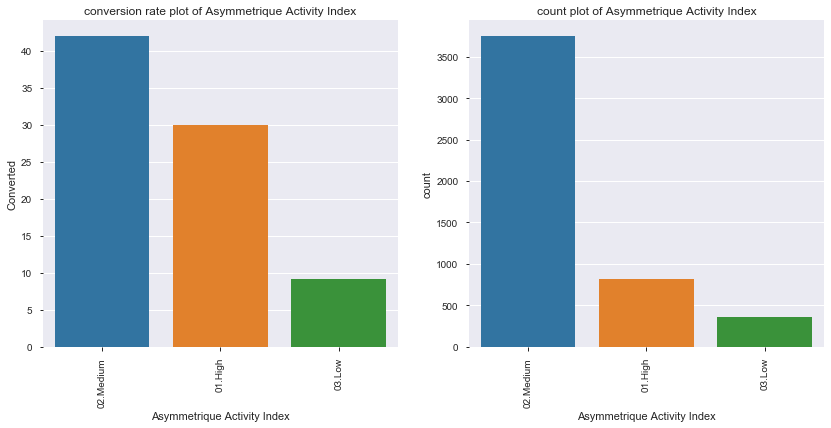

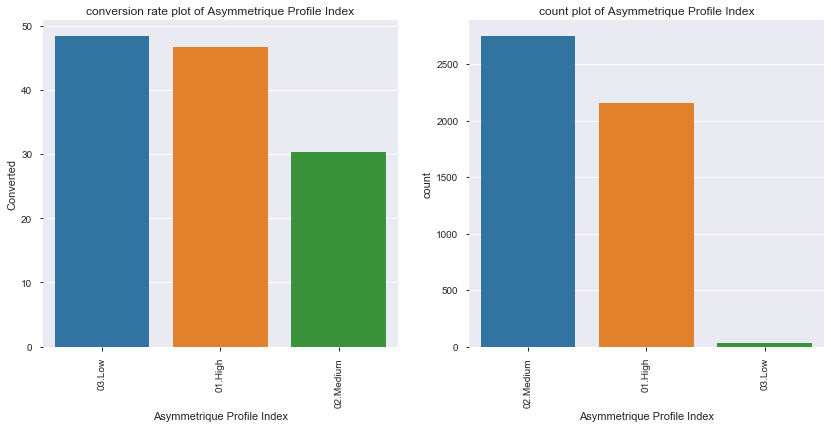

In [23]:
for col in null_obj_cols:
    catplot(leads_df, col)

In [24]:
# Dropping cols for nan values - 'How did you hear about X Education'

# City doesnt show much difference with respect to target variable 'Converted' and can be removed

# Most frequent country is India in the country feature. If we impute nan values of country column with India it doesnt offer any variation. so dropping it

cols_toremove2 = ['How did you hear about X Education','Country', 'City']
leads_df = leads_df.drop(cols_toremove2,axis = 1)

for col in cols_toremove2:
    null_obj_cols.remove(col)

In [25]:
# Identifying null values again

leads_df[null_obj_cols].isnull().sum()/len(leads_df)*100

Lead Source                                       0.318576
Specialization                                   36.295727
What is your current occupation                  29.473800
What matters most to you in choosing a course    29.682522
Tags                                             36.614303
Lead Quality                                     51.949907
Lead Profile                                     74.491926
Asymmetrique Activity Index                      45.787103
Asymmetrique Profile Index                       45.787103
dtype: float64

In [26]:
# imputing null values for each column as a separate category
for col in null_obj_cols:
    leads_df.loc[leads_df[col].isnull(), col] = col+'_null'

# Checking for nan values
leads_df.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Tags                                             0
Lead Quality                                     0
Lead Profile                                     0
Asymmetrique Activity Index                      0
Asymmetrique Profile Index                       0
A free copy of Mastering The Interview           0
Last Notable Activity          

### 3.3  Removing Unique columns and creation/modifying existing columns based on EDA

In [27]:
# Categorical needed to be converted into dummies or label encoding
leads_var = leads_df.copy()

# dropping unique id columns 'Prospect ID' and 'Lead Number'
leads_var = leads_var.drop(['Prospect ID', 'Lead Number'], axis = 1)

In [28]:
# last notable activity is adding only one value information (i.e modified) so using modified instead of Last Notable activity
leads_var ["Last Notable Activity_Modified"] = leads_var['Last Notable Activity'].apply(lambda x: 0 if x != 'Modified' else 1)
leads_var = leads_var.drop('Last Notable Activity', axis = 1)

# Grouping the tags column based on EDA

educational_reasons = ['Already a student', 'Diploma holder (Not Eligible)',
       'Graduation in progress', 'Interested  in full time MBA',
       'Interested in other courses', 
       'Not doing further education', 'Recognition issue (DEC approval)','University not recognized']

phone_reasons = ['Ringing','invalid number', 'number not provided', 'opp hangup', 'switched off','wrong number given']

leads_var['Tags'] = leads_var['Tags'].apply(lambda x: x if x not in educational_reasons else 'edu_reasons')

leads_var['Tags'] = leads_var['Tags'].apply(lambda x: x if x not in phone_reasons else 'phone_reasons')

### 3.4 Converting Categorical Columns suitably for the model

In [29]:
# Identifying numeric columns
numeric_cols =  list(leads_var.select_dtypes(include = 'number').columns)
categorical_cols = list(leads_var.select_dtypes(include = "object").columns)

print('Numeric columns: '+str(len(numeric_cols)))
print('Categorical columns: '+str(len(categorical_cols)))

Numeric columns: 5
Categorical columns: 13


In [30]:
# converting yes to 1 and no to zero for 'A free copy of Mastering The Interview', 'Asymmetrique Profile Index'
binary_cols = ['A free copy of Mastering The Interview', 'Do Not Email']
for col in binary_cols:
    leads_var[col] = leads_var[col].str.lower()
leads_var[binary_cols] = leads_var[binary_cols].replace({'yes': 1, 'no': 0})

In [31]:
# Identifying cols thate are requried for OHE (dummy) conversion
dummy_cols = [col for col in categorical_cols if col not in binary_cols]
dummy_cols

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'Specialization',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index']

In [32]:
# getting dummies for categorical columns thats not been treated and not numerical
dummy_df = pd.get_dummies(leads_var[dummy_cols])
dummy_df.shape 

(9103, 108)

In [33]:
# Removing dummy cals that have values less than 25 ones 
d_cols = list(dummy_df.columns)

# removing null category created for various categorical cols
d_cols = [col for col in d_cols if col.split('_')[-1] != 'null']

dummy_df = dummy_df[d_cols]

# removing categories having value_counts less than 25
new_cols = dummy_df.columns[(dummy_df.sum()>25).values]
dummy_df = dummy_df[new_cols]
dummy_df.shape

(9103, 64)

In [34]:
# concatenating the dummy and other dataframe to obtain the final data frame
leads_final = pd.concat([leads_var[numeric_cols+binary_cols], dummy_df], axis = 1)

In [35]:
leads_final.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Notable Activity_Modified,A free copy of Mastering The Interview,Do Not Email,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Lead Quality_Worst,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Asymmetrique Activity Index_01.High,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_01.High,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low
0,0,0.0,0,0.0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0,5.0,674,2.5,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
2,1,2.0,1532,2.0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
3,0,1.0,305,1.0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
4,1,2.0,1428,1.0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0


### 3.5  Splitting the data - Test and Train

In [36]:
# Cheking the numeric cols and removing 'Last Notable Activity_Modified'
numeric_cols.remove('Last Notable Activity_Modified')

In [37]:
# splitting the test and train data
df_train, df_test = train_test_split(leads_final,train_size = 0.7, random_state = 100)

In [38]:
# Checking the df_train
df_train.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Notable Activity_Modified,A free copy of Mastering The Interview,Do Not Email,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Lead Quality_Worst,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Asymmetrique Activity Index_01.High,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_01.High,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low
7962,0,3.0,1286,1.5,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
5520,0,7.0,60,7.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1962,0,5.0,169,2.5,1,0,0,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1566,1,14.0,1241,3.5,0,0,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
9170,0,0.0,0,0.0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,1,0


In [39]:
# Checking the df_test
df_test.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Notable Activity_Modified,A free copy of Mastering The Interview,Do Not Email,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,...,Lead Quality_Worst,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Asymmetrique Activity Index_01.High,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_01.High,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low
3504,0,3.0,424,3.00,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4050,1,0.0,0,0.00,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
7201,0,2.0,712,2.00,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1196,0,4.0,423,4.00,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
8219,1,7.0,247,1.75,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


### 3.6 Scaling the numerical Data for Model 

In [40]:
numeric_cols

# removing 'Converted' column fro numerical cols
numeric_cols.remove('Converted')

# Initializing the Standarad scaler
scaler = StandardScaler()

# Transforming the numerical cols of the train cols
df_train[numeric_cols] = scaler.fit_transform(df_train[numeric_cols])

y_train = df_train.pop('Converted')

X_train = df_train

## 4. Modelling the data using Logistic Regression <a id='IV'></a>

### 4.1 Initiating the stats model for understanding and creating functions for repeated evaluation

In [41]:
# checking the X_train
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Notable Activity_Modified,A free copy of Mastering The Interview,Do Not Email,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Lead Quality_Worst,Lead Profile_Other Leads,Lead Profile_Potential Lead,Lead Profile_Student of SomeSchool,Asymmetrique Activity Index_01.High,Asymmetrique Activity Index_02.Medium,Asymmetrique Activity Index_03.Low,Asymmetrique Profile Index_01.High,Asymmetrique Profile Index_02.Medium,Asymmetrique Profile Index_03.Low
7962,-0.092900,1.476324,-0.394072,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
5520,0.695064,-0.771066,2.111481,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1962,0.301082,-0.571257,0.061483,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
1566,2.074000,1.393834,0.517039,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
9170,-0.683873,-0.881052,-1.077404,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [42]:
# creating function for statsmodels, metric scores and vifs for quick running of the models

def statmodel(X_train):
    logm1 = sm.GLM(y_train, sm.add_constant(X_train), family = sm.families.Binomial(), random_state = 100)
    res = logm1.fit()
    return res
    
def metric_score(res, X_train, y_train):
    y_pred = res.predict(sm.add_constant(X_train))
    y_pred = y_pred.apply(lambda x: 1 if x>0.5 else 0)
    print('precision_score {}'.format(round(metrics.precision_score(y_train, y_pred)*100,2)))
    print('accuracy_score {}'.format(round(metrics.accuracy_score(y_train, y_pred)*100,2)))
    print('recall_score {}'.format(round(metrics.recall_score(y_train, y_pred)*100,2)))
    
def var_if(X_train):
    vif = pd.DataFrame()
    vif['vif'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
    vif['features'] = X_train.columns
    return vif

In [43]:
# initiating the model with all the variables to understand
res = statmodel(X_train)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           68
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1028.8
Date:                Sun, 25 Aug 2019   Deviance:                       2057.5
Time:                        15:31:39   Pearson chi2:                 8.90e+03
No. Iterations:                   100   Covariance Type:             nonrobust
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -0.5642      1.047     -0.539      0.590      -2.616       1.488
TotalVisits                                                               0.1497      0.055      2.722      0.006       0.042       0.257
Total Time Spent on Website                                               1.0297      0.068     15.079      0.000       0.896       1.164
Page Views Per Visit                                                     -0.0571      0.076     -0.750      0.453      -0.207       0.092
Last Notable Activity_Modified                                           -1.2347      0.160     -7.697      0.000      -1.549      -0.920
A free copy of Mastering The Interview                                   -0.0343      0.195     -0.177      0.860      -0.416       0.347
Do Not Email                                                             -1.1206      0.342     -3.277      0.001      -1.791      -0.450
Lead Origin_API                                                          -0.7932      0.653     -1.215      0.224      -2.073       0.486
Lead Origin_Landing Page Submission                                      -0.9066      0.643     -1.409      0.159      -2.168       0.354
Lead Origin_Lead Add Form                                                -0.8449      0.895     -0.944      0.345      -2.599       0.910
Lead Origin_Lead Import                                                   1.9805      1.750      1.132      0.258      -1.449       5.410
Lead Source_Direct Traffic                                               -1.0213      0.853     -1.198      0.231      -2.693       0.650
Lead Source_Facebook                                                     -3.6903      2.191     -1.685      0.092      -7.984       0.603
Lead Source_Google                                                       -0.9483      0.843     -1.125      0.260      -2.600       0.704
Lead Source_Olark Chat                                                   -0.1971      0.856     -0.230      0.818      -1.874       1.480
Lead Source_Organic Search                                               -0.9497      0.857     -1.108      0.268      -2.630       0.730
Lead Source_Reference                                                    -0.2716      0.970     -0.280      0.779      -2.172       1.629
Lead Source_Referral Sites                                               -1.0005      0.990     -1.010      0.312      -2.942       0.941
Lead Source_Welingak Website                                              2.6240      1.140      2.301      0.021       0.389       4.859
Last Activity_Converted to Lead                                          -0.4831      1.079     -0.448      0.654      -2.598 

In [44]:
# checking the metrics for all the variables in the dataframe
metric_score(res, X_train, y_train)

precision_score 93.14
accuracy_score 94.01
recall_score 90.91


###  4.2 Using RFE to select 20 important variables

In [45]:
# initiating the logistic regresion
logreg = LogisticRegression(solver = 'liblinear', random_state = 100)

# fitting the data with logistic  and rfe for obtaining top 20 variables
rfe = RFE(logreg, 20)             
rfe = rfe.fit(X_train, y_train)

# creating rfe_col
rfe_col = X_train.columns[rfe.support_]

In [46]:
rfe_col

Index(['Total Time Spent on Website', 'Last Notable Activity_Modified',
       'Do Not Email', 'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Welingak Website', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Last Activity_Unsubscribed',
       'What matters most to you in choosing a course_Better Career Prospects',
       'Tags_Busy', 'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email', 'Tags_edu_reasons',
       'Tags_phone_reasons', 'Lead Quality_High in Relevance',
       'Lead Quality_Worst', 'Lead Profile_Student of SomeSchool',
       'Asymmetrique Activity Index_03.Low'],
      dtype='object')

### 4.3 Iterating through various models and dropping variables based on p value and vif

In [47]:
# Running the mdoel based on 20 selected variables from RFE
X_train1 = X_train[rfe_col]
res = statmodel(X_train1)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6351
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1061.7
Date:                Sun, 25 Aug 2019   Deviance:                       2123.3
Time:                        15:31:41   Pearson chi2:                 9.68e+03
No. Iterations:                     8   Covariance Type:             nonrobust
=========================================================================================================================================
                                                                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------
const                                                                    -1.8323      0.134    -13.679      0.000      -2.095      -1.570
Total Time Spent on Website                                               0.9196      0.061     15.011      0.000       0.800       1.040
Last Notable Activity_Modified                                           -1.2929      0.141     -9.152      0.000      -1.570      -1.016
Do Not Email                                                             -1.1931      0.268     -4.446      0.000      -1.719      -0.667
Lead Source_Direct Traffic                                               -0.6252      0.158     -3.963      0.000      -0.934      -0.316
Lead Source_Google                                                       -0.4598      0.142     -3.237      0.001      -0.738      -0.181
Lead Source_Welingak Website                                              2.9685      0.745      3.986      0.000       1.509       4.428
Last Activity_Olark Chat Conversation                                    -0.7208      0.258     -2.791      0.005      -1.227      -0.215
Last Activity_SMS Sent                                                    1.9963      0.133     15.041      0.000       1.736       2.256
Last Activity_Unsubscribed                                                1.7574      0.764      2.301      0.021       0.261       3.254
What matters most to you in choosing a course_Better Career Prospects     2.7676      0.159     17.448      0.000       2.457       3.079
Tags_Busy                                                                -1.5562      0.267     -5.831      0.000      -2.079      -1.033
Tags_Closed by Horizzon                                                   4.4619      0.750      5.950      0.000       2.992       5.932
Tags_Lost to EINS                                                         6.6466      0.809      8.220      0.000       5.062       8.231
Tags_Will revert after reading the email                                  2.5355      0.217     11.682      0.000       2.110       2.961
Tags_edu_reasons                                                         -3.6705      0.280    -13.095      0.000      -4.220      -3.121
Tags_phone_reasons                                                       -5.3835      0.257    -20.923      0.000      -5.888      -4.879
Lead Quality_High in Relevance                                            1.0399      0.457      2.277      0.023       0.145       1.935
Lead Quality_Worst                                                       -1.4450      0.748     -1.932      0.053      -2.911       0.021
Lead Profile_Student of SomeSchool                                       -1.6243      1.020     -1.592      0.111      -3.623 

In [48]:
# Evaluating metrics for the model created
metric_score(res, X_train1, y_train)

# variance Inflation factor for the train variables
var_if(X_train1)

precision_score 92.99
accuracy_score 94.01
recall_score 91.07


,vif,features
0,1.212822,Total Time Spent on Website
1,1.849140,Last Notable Activity_Modified
2,1.232613,Do Not Email
3,1.620277,Lead Source_Direct Traffic
4,1.630054,Lead Source_Google
5,1.156921,Lead Source_Welingak Website
6,1.320099,Last Activity_Olark Chat Conversation
7,1.640375,Last Activity_SMS Sent
8,1.089061,Last Activity_Unsubscribed
9,9.243570,What matters most to you in choosing a course_...


In [49]:
# removing high vif column - 'What matters most to you in choosing a course_Better Career Prospects'
X_train2 = X_train1.drop(['What matters most to you in choosing a course_Better Career Prospects'], axis = 1)
res = statmodel(X_train2)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6352
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1239.4
Date:                Sun, 25 Aug 2019   Deviance:                       2478.7
Time:                        15:31:41   Pearson chi2:                 9.19e+03
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.7889      0.103     -7.669      0.000      -0.991      -0.587
Total Time Spent on Website                  0.9154      0.056     16.307      0.000       0.805       1.025
Last Notable Activity_Modified              -1.5377      0.131    -11.726      0.000      -1.795      -1.281
Do Not Email                                -0.8633      0.247     -3.501      0.000      -1.347      -0.380
Lead Source_Direct Traffic                  -0.9209      0.146     -6.290      0.000      -1.208      -0.634
Lead Source_Google                          -0.6062      0.129     -4.702      0.000      -0.859      -0.353
Lead Source_Welingak Website                 4.7136      0.738      6.389      0.000       3.268       6.160
Last Activity_Olark Chat Conversation       -0.6753      0.233     -2.898      0.004      -1.132      -0.219
Last Activity_SMS Sent                       1.8594      0.117     15.830      0.000       1.629       2.090
Last Activity_Unsubscribed                   0.6864      0.732      0.938      0.348      -0.748       2.121
Tags_Busy                                    0.4576      0.235      1.945      0.052      -0.004       0.919
Tags_Closed by Horizzon                      6.3713      0.742      8.591      0.000       4.918       7.825
Tags_Lost to EINS                            6.8520      0.777      8.820      0.000       5.329       8.375
Tags_Will revert after reading the email     4.4910      0.192     23.369      0.000       4.114       4.868
Tags_edu_reasons                            -1.7717      0.258     -6.863      0.000      -2.278      -1.266
Tags_phone_reasons                          -3.4086      0.221    -15.448      0.000      -3.841      -2.976
Lead Quality_High in Relevance               1.2497      0.477      2.618      0.009       0.314       2.185
Lead Quality_Worst                          -1.2684      0.689     -1.841      0.066      -2.619       0.082
Lead Profile_Student of SomeSchool          -1.3627      0.967     -1.409      0.159      -3.258       0.532
Asymmetrique Activity Index_03.Low          -1.8189      0.459     -3.961      0.000      -2.719      -0.919
============================================================================================================
"""

In [50]:
# Evaluating metrics for the model created
metric_score(res, X_train2, y_train)

# variance Inflation factor for the train variables
var_if(X_train2)

precision_score 92.33
accuracy_score 92.69
recall_score 88.05


,vif,features
0,1.212822,Total Time Spent on Website
1,1.849067,Last Notable Activity_Modified
2,1.230790,Do Not Email
3,1.603937,Lead Source_Direct Traffic
4,1.585932,Lead Source_Google
5,1.049941,Lead Source_Welingak Website
6,1.311401,Last Activity_Olark Chat Conversation
7,1.580334,Last Activity_SMS Sent
8,1.088829,Last Activity_Unsubscribed
9,1.063814,Tags_Busy


In [51]:
# removing high p-value column Last Activity_Unsubscribed
X_train3 = X_train2.drop(['Last Activity_Unsubscribed'], axis = 1)
res = statmodel(X_train3)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6353
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1239.8
Date:                Sun, 25 Aug 2019   Deviance:                       2479.5
Time:                        15:31:42   Pearson chi2:                 9.13e+03
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.7840      0.103     -7.635      0.000      -0.985      -0.583
Total Time Spent on Website                  0.9160      0.056     16.321      0.000       0.806       1.026
Last Notable Activity_Modified              -1.5414      0.131    -11.764      0.000      -1.798      -1.285
Do Not Email                                -0.8040      0.236     -3.404      0.001      -1.267      -0.341
Lead Source_Direct Traffic                  -0.9249      0.146     -6.322      0.000      -1.212      -0.638
Lead Source_Google                          -0.6075      0.129     -4.711      0.000      -0.860      -0.355
Lead Source_Welingak Website                 4.7002      0.737      6.374      0.000       3.255       6.145
Last Activity_Olark Chat Conversation       -0.6796      0.233     -2.918      0.004      -1.136      -0.223
Last Activity_SMS Sent                       1.8517      0.117     15.817      0.000       1.622       2.081
Tags_Busy                                    0.4578      0.235      1.947      0.052      -0.003       0.919
Tags_Closed by Horizzon                      6.3723      0.742      8.590      0.000       4.918       7.826
Tags_Lost to EINS                            6.8421      0.776      8.813      0.000       5.320       8.364
Tags_Will revert after reading the email     4.4959      0.192     23.384      0.000       4.119       4.873
Tags_edu_reasons                            -1.7741      0.258     -6.873      0.000      -2.280      -1.268
Tags_phone_reasons                          -3.4075      0.221    -15.445      0.000      -3.840      -2.975
Lead Quality_High in Relevance               1.2497      0.477      2.618      0.009       0.314       2.185
Lead Quality_Worst                          -1.2701      0.691     -1.838      0.066      -2.624       0.084
Lead Profile_Student of SomeSchool          -1.3623      0.968     -1.408      0.159      -3.259       0.534
Asymmetrique Activity Index_03.Low          -1.7832      0.454     -3.929      0.000      -2.673      -0.894
============================================================================================================
"""

In [52]:
# Evaluating metrics for the model created
metric_score(res, X_train3, y_train)

# variance Inflation factor for the train variables
var_if(X_train3)

precision_score 92.36
accuracy_score 92.69
recall_score 88.01


,vif,features
0,1.212821,Total Time Spent on Website
1,1.843959,Last Notable Activity_Modified
2,1.144479,Do Not Email
3,1.603603,Lead Source_Direct Traffic
4,1.585547,Lead Source_Google
5,1.049926,Lead Source_Welingak Website
6,1.311388,Last Activity_Olark Chat Conversation
7,1.575065,Last Activity_SMS Sent
8,1.063736,Tags_Busy
9,1.318454,Tags_Closed by Horizzon


In [53]:
# removing the col with high p value -Lead Profile_Student of SomeSchool
X_train4 = X_train3.drop(['Lead Profile_Student of SomeSchool'], axis = 1)
res = statmodel(X_train4)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6354
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1240.7
Date:                Sun, 25 Aug 2019   Deviance:                       2481.5
Time:                        15:31:42   Pearson chi2:                 9.08e+03
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.7867      0.103     -7.661      0.000      -0.988      -0.585
Total Time Spent on Website                  0.9156      0.056     16.329      0.000       0.806       1.026
Last Notable Activity_Modified              -1.5420      0.131    -11.767      0.000      -1.799      -1.285
Do Not Email                                -0.7958      0.236     -3.375      0.001      -1.258      -0.334
Lead Source_Direct Traffic                  -0.9265      0.146     -6.330      0.000      -1.213      -0.640
Lead Source_Google                          -0.6036      0.129     -4.684      0.000      -0.856      -0.351
Lead Source_Welingak Website                 4.6991      0.737      6.374      0.000       3.254       6.144
Last Activity_Olark Chat Conversation       -0.6742      0.233     -2.900      0.004      -1.130      -0.219
Last Activity_SMS Sent                       1.8538      0.117     15.837      0.000       1.624       2.083
Tags_Busy                                    0.4581      0.235      1.948      0.051      -0.003       0.919
Tags_Closed by Horizzon                      6.3567      0.742      8.568      0.000       4.903       7.811
Tags_Lost to EINS                            6.7647      0.760      8.903      0.000       5.275       8.254
Tags_Will revert after reading the email     4.4805      0.191     23.416      0.000       4.105       4.855
Tags_edu_reasons                            -1.7819      0.258     -6.897      0.000      -2.288      -1.276
Tags_phone_reasons                          -3.4057      0.221    -15.438      0.000      -3.838      -2.973
Lead Quality_High in Relevance               1.2603      0.476      2.645      0.008       0.326       2.194
Lead Quality_Worst                          -1.6357      0.670     -2.441      0.015      -2.949      -0.322
Asymmetrique Activity Index_03.Low          -1.7639      0.451     -3.915      0.000      -2.647      -0.881
============================================================================================================
"""

In [54]:
# Evaluating metrics for the model created
metric_score(res, X_train4, y_train)

# variance Inflation factor for the train variables
var_if(X_train4)

precision_score 92.4
accuracy_score 92.7
recall_score 88.01


,vif,features
0,1.212712,Total Time Spent on Website
1,1.841639,Last Notable Activity_Modified
2,1.144350,Do Not Email
3,1.603233,Lead Source_Direct Traffic
4,1.585547,Lead Source_Google
5,1.049924,Lead Source_Welingak Website
6,1.310149,Last Activity_Olark Chat Conversation
7,1.574590,Last Activity_SMS Sent
8,1.063717,Tags_Busy
9,1.317874,Tags_Closed by Horizzon


In [55]:
# removing the col with high p value - 'Tags Busy'
X_train5 = X_train4.drop(['Tags_Busy'], axis = 1)
res = statmodel(X_train5)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6355
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1242.6
Date:                Sun, 25 Aug 2019   Deviance:                       2485.3
Time:                        15:31:42   Pearson chi2:                 9.20e+03
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.7717      0.102     -7.543      0.000      -0.972      -0.571
Total Time Spent on Website                  0.9197      0.056     16.421      0.000       0.810       1.030
Last Notable Activity_Modified              -1.5516      0.131    -11.866      0.000      -1.808      -1.295
Do Not Email                                -0.8133      0.236     -3.451      0.001      -1.275      -0.351
Lead Source_Direct Traffic                  -0.8981      0.145     -6.184      0.000      -1.183      -0.613
Lead Source_Google                          -0.5949      0.129     -4.626      0.000      -0.847      -0.343
Lead Source_Welingak Website                 4.6820      0.737      6.349      0.000       3.237       6.127
Last Activity_Olark Chat Conversation       -0.6772      0.232     -2.917      0.004      -1.132      -0.222
Last Activity_SMS Sent                       1.8844      0.116     16.222      0.000       1.657       2.112
Tags_Closed by Horizzon                      6.3381      0.742      8.545      0.000       4.884       7.792
Tags_Lost to EINS                            6.7426      0.760      8.876      0.000       5.254       8.231
Tags_Will revert after reading the email     4.4552      0.191     23.324      0.000       4.081       4.830
Tags_edu_reasons                            -1.8133      0.258     -7.021      0.000      -2.320      -1.307
Tags_phone_reasons                          -3.4571      0.219    -15.757      0.000      -3.887      -3.027
Lead Quality_High in Relevance               1.2806      0.478      2.680      0.007       0.344       2.217
Lead Quality_Worst                          -1.6324      0.671     -2.434      0.015      -2.947      -0.318
Asymmetrique Activity Index_03.Low          -1.7713      0.453     -3.914      0.000      -2.658      -0.884
============================================================================================================
"""

In [56]:
# Evaluating metrics for the model created
metric_score(res, X_train5, y_train)

# variance Inflation factor for the train variables
var_if(X_train5)

precision_score 92.75
accuracy_score 92.78
recall_score 87.85


,vif,features
0,1.211685,Total Time Spent on Website
1,1.841637,Last Notable Activity_Modified
2,1.143878,Do Not Email
3,1.581610,Lead Source_Direct Traffic
4,1.569938,Lead Source_Google
5,1.049579,Lead Source_Welingak Website
6,1.309803,Last Activity_Olark Chat Conversation
7,1.533439,Last Activity_SMS Sent
8,1.316861,Tags_Closed by Horizzon
9,1.065830,Tags_Lost to EINS


In [57]:
# removing the col with high p-value and seeing if it affects the model
X_train6 = X_train5.drop(['Lead Quality_Worst'], axis = 1)
res = statmodel(X_train6)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1246.6
Date:                Sun, 25 Aug 2019   Deviance:                       2493.2
Time:                        15:31:42   Pearson chi2:                 9.42e+03
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.7746      0.102     -7.572      0.000      -0.975      -0.574
Total Time Spent on Website                  0.9209      0.056     16.450      0.000       0.811       1.031
Last Notable Activity_Modified              -1.5464      0.131    -11.827      0.000      -1.803      -1.290
Do Not Email                                -0.8378      0.236     -3.549      0.000      -1.300      -0.375
Lead Source_Direct Traffic                  -0.9104      0.145     -6.281      0.000      -1.195      -0.626
Lead Source_Google                          -0.5967      0.129     -4.640      0.000      -0.849      -0.345
Lead Source_Welingak Website                 4.6826      0.737      6.351      0.000       3.238       6.128
Last Activity_Olark Chat Conversation       -0.6691      0.232     -2.886      0.004      -1.124      -0.215
Last Activity_SMS Sent                       1.8982      0.116     16.314      0.000       1.670       2.126
Tags_Closed by Horizzon                      6.3082      0.741      8.514      0.000       4.856       7.760
Tags_Lost to EINS                            6.5635      0.746      8.798      0.000       5.101       8.026
Tags_Will revert after reading the email     4.4416      0.190     23.318      0.000       4.068       4.815
Tags_edu_reasons                            -2.1364      0.245     -8.728      0.000      -2.616      -1.657
Tags_phone_reasons                          -3.4768      0.219    -15.853      0.000      -3.907      -3.047
Lead Quality_High in Relevance               1.3872      0.493      2.816      0.005       0.422       2.353
Asymmetrique Activity Index_03.Low          -1.7659      0.455     -3.878      0.000      -2.658      -0.873
============================================================================================================
"""

In [58]:
# Evaluating metrics for the model created
metric_score(res, X_train6, y_train)

# variance Inflation factor for the train variables
var_if(X_train6)

precision_score 92.71
accuracy_score 92.77
recall_score 87.85


,vif,features
0,1.211446,Total Time Spent on Website
1,1.837404,Last Notable Activity_Modified
2,1.132800,Do Not Email
3,1.573661,Lead Source_Direct Traffic
4,1.569794,Lead Source_Google
5,1.049577,Lead Source_Welingak Website
6,1.308998,Last Activity_Olark Chat Conversation
7,1.532611,Last Activity_SMS Sent
8,1.316454,Tags_Closed by Horizzon
9,1.064531,Tags_Lost to EINS


In [59]:
# removing the some of the low important cols
X_train7 = X_train6.drop(['Asymmetrique Activity Index_03.Low', 'Lead Quality_High in Relevance', 'Last Activity_Olark Chat Conversation', 'Do Not Email'], axis = 1)
res = statmodel(X_train7)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6360
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1271.7
Date:                Sun, 25 Aug 2019   Deviance:                       2543.4
Time:                        15:31:42   Pearson chi2:                 1.00e+04
No. Iterations:                     8   Covariance Type:             nonrobust
============================================================================================================
                                               coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                       -0.9181      0.097     -9.433      0.000      -1.109      -0.727
Total Time Spent on Website                  0.9286      0.055     16.736      0.000       0.820       1.037
Last Notable Activity_Modified              -1.7136      0.126    -13.559      0.000      -1.961      -1.466
Lead Source_Direct Traffic                  -0.8916      0.142     -6.272      0.000      -1.170      -0.613
Lead Source_Google                          -0.5447      0.127     -4.292      0.000      -0.793      -0.296
Lead Source_Welingak Website                 4.6682      0.737      6.338      0.000       3.225       6.112
Last Activity_SMS Sent                       1.9740      0.114     17.355      0.000       1.751       2.197
Tags_Closed by Horizzon                      7.1334      0.724      9.850      0.000       5.714       8.553
Tags_Lost to EINS                            6.5036      0.730      8.914      0.000       5.074       7.934
Tags_Will revert after reading the email     4.6352      0.185     25.040      0.000       4.272       4.998
Tags_edu_reasons                            -2.1152      0.240     -8.810      0.000      -2.586      -1.645
Tags_phone_reasons                          -3.4994      0.219    -15.954      0.000      -3.929      -3.069
============================================================================================================
"""

In [60]:
# Evaluating metrics for the model created
metric_score(res, X_train7, y_train)

# variance Inflation factor for the train variables
var_if(X_train7)

precision_score 92.38
accuracy_score 92.78
recall_score 88.26


,vif,features
0,1.188170,Total Time Spent on Website
1,1.501318,Last Notable Activity_Modified
2,1.530307,Lead Source_Direct Traffic
3,1.559711,Lead Source_Google
4,1.047689,Lead Source_Welingak Website
5,1.522310,Last Activity_SMS Sent
6,1.052345,Tags_Closed by Horizzon
7,1.060672,Tags_Lost to EINS
8,1.456985,Tags_Will revert after reading the email
9,1.364545,Tags_edu_reasons


In [61]:
# Finalizing the model with 11 variables
X_train_final = X_train7

X_train_final.shape[1]

11

## 5. Model Evaluation and K-Cross validation on the train data set <a id='V'></a>

### 5.1 Identifying important metrics accuracy score, sensitivity, specificity, precision and recall scores for the business objective

In [62]:
# predicting the probabilities for X_train_final
y_train_prob = res.predict(sm.add_constant(X_train_final))

train_pred = pd.DataFrame({'Converted_train': y_train, 'Converted_train_prob': y_train_prob})
train_pred['Converted_train_pred'] = train_pred['Converted_train_prob'].apply(lambda x: 1 if x > 0.5 else 0)

confusion_train = metrics.confusion_matrix(train_pred['Converted_train'], train_pred['Converted_train_pred'])
print(confusion_train)

[[3777  176]
 [ 284 2135]]


In [63]:
# identifying metrics score
metric_score(res, X_train_final, y_train)

precision_score 92.38
accuracy_score 92.78
recall_score 88.26


**Inferences from Business Objective: Precision Score, Recall Score and Accuracy are important for the model**

**Importance of precision score:**

**1. Precision score is `TP/(TP+FP)`, this is the conversion rate for the hotleads identified through the model.**

**2. The conversion rate is Precision Score which indicates out of the total positives indicated by the model how many of them actually converted**

**Importance of recall score:**

**1. Recall score is the ratio `TP/(TP+FN)` which indicates the amount of true positives captured through this model**

**2. Recall score is also important low recall score means we might miss some of the customers which can be targeted for conversion.**

**Precision vs Recall - Trade Off**:

**1. Both precision and recall needs to be high but there is trade-off between these two**

**2. We need to select precision above 80% as indicated in the business objective and recall score needs to be high at least 90%**

###  5.2 Bulding roc_curve, precision_recall curve

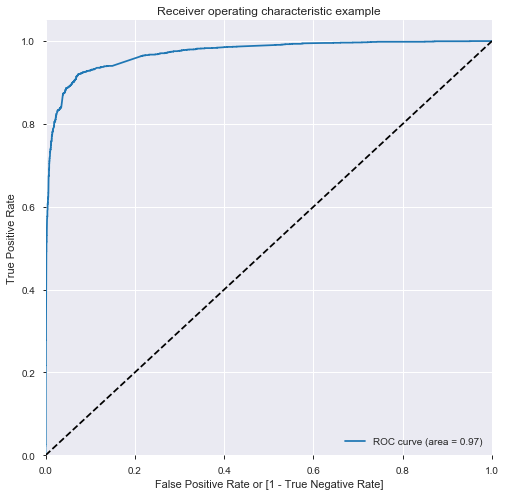

In [64]:
# drawing ROC curve for the model
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(8, 8))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None


draw_roc(train_pred['Converted_train'], train_pred['Converted_train_prob'])

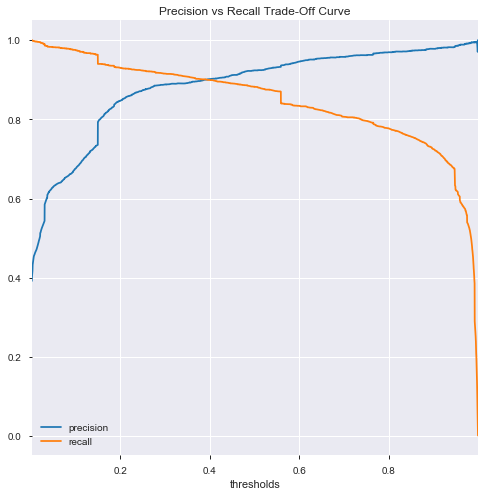

In [65]:
# plotting precision vs trade off curve
p, r, thresholds = precision_recall_curve(train_pred['Converted_train'], train_pred['Converted_train_prob'])

pre_recal = pd.DataFrame({'precision':p[:-1], 'recall':r[:-1], 'thresholds': thresholds})
pre_recal.plot.line(x='thresholds', y=['precision','recall'], figsize = (8,8))
plt.title('Precision vs Recall Trade-Off Curve')
plt.show()

### 5.3 Precision vs Recall trade off Selecting the threshold probability cut-off for precision score based on the business objective

In [66]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    train_pred[i]= train_pred['Converted_train_prob'].map(lambda x: 1 if x > i else 0)
train_pred.head()

,Converted_train,Converted_train_prob,Converted_train_pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
7962,0,0.165578,0,1,1,0,0,0,0,0,0,0,0
5520,0,0.074073,0,1,0,0,0,0,0,0,0,0,0
1962,0,0.005313,0,1,0,0,0,0,0,0,0,0,0
1566,1,0.988646,1,1,1,1,1,1,1,1,1,1,1
9170,0,0.020807,0,1,0,0,0,0,0,0,0,0,0


In [67]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci', 'prec', 'recal'])


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(train_pred['Converted_train'], train_pred[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    prec = metrics.precision_score(train_pred['Converted_train'], train_pred[i])
    recal = metrics.recall_score(train_pred['Converted_train'], train_pred[i])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci, prec, recal]
cutoff_df

,prob,accuracy,sensi,speci,prec,recal
0.0,0.0,0.379630,1.000000,0.000000,0.379630,1.000000
0.1,0.1,0.812618,0.974783,0.713382,0.675451,0.974783
0.2,0.2,0.909605,0.930136,0.897040,0.846820,0.930136
0.3,0.3,0.924043,0.915254,0.929421,0.888087,0.915254
0.4,0.4,0.924670,0.899132,0.940299,0.902115,0.899132
0.5,0.5,0.927809,0.882596,0.955477,0.923842,0.882596
0.6,0.6,0.919021,0.834229,0.970908,0.946085,0.834229
0.7,0.7,0.913057,0.806532,0.978244,0.957781,0.806532
0.8,0.8,0.906152,0.777181,0.985075,0.969572,0.777181
0.9,0.9,0.889360,0.724680,0.990134,0.978237,0.724680


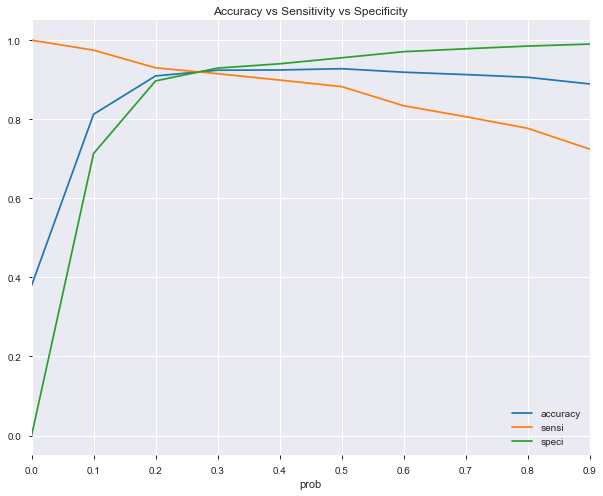

In [68]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize = (10,8))
plt.title('Accuracy vs Sensitivity vs Specificity')
plt.show()

**Inferences:**

**1. The optimal cut-offs could be 0.2, 0.3 and 0.4.**

**2. As stated earlier, precision, recall and accuracy are important considerations for the business objectives.**

**3. `The cut-off can be considered as 0.2`. The threshold of 0.2 converts 85% of identified hotleads to acutal converted and also captures 93% of converted customers of the dataset. `Any increase in threshold means loosing precious customers`**

**4. If we consider 0.3/0.4 the conversion rate increase to 88%/90% but total converted customers captured by the model decreases to 91%/90% respectively**

### 5.4 Updating the model with threshold probability chosen

In [69]:
# updating the model with threshold cut-off choosen
train_pred['Converted_train_pred'] = train_pred['Converted_train_prob'].apply(lambda x: 1 if x > 0.2 else 0)

In [70]:
confusion_train = metrics.confusion_matrix(train_pred['Converted_train'], train_pred['Converted_train_pred'])
confusion_train

array([[3546,  407],
       [ 169, 2250]], dtype=int64)

### 5.5 K-Cross Validation on the train dataset

In [71]:
# creating function for K-Cross Validation on the train dataset
def k_cross_validation(X_train, y_train,i=0.2):
    X_trainr = X_train.copy()
    X_trainr = X_trainr.reset_index()
    X_trainr = X_trainr.drop('index', axis = 1)
    
    y_trainr = y_train.copy()
    y_trainr = y_train.reset_index()
    y_trainr = y_trainr.drop('index', axis = 1)
    y_trainr = y_trainr['Converted']
    
    ps_train= []
    ps_test = []
    acc_train=[]
    acc_test = []
    recal_train=[]
    recal_test=[]
    
    rkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=100)
    for train_index, test_index in rkf.split(X_trainr):
        X_train_d, X_test_d = X_trainr.loc[train_index], X_trainr.loc[test_index] 
        y_train_d, y_test_d = y_trainr[train_index], y_trainr[test_index]
        logm1 = sm.GLM(y_train_d, sm.add_constant(X_train_d), family = sm.families.Binomial())
        res = logm1.fit()
        y_train_pred_d = res.predict(sm.add_constant(X_train_d))
        y_train_pred_d = y_train_pred_d.apply(lambda x: 1 if x>i else 0)
        ps_train.append(metrics.precision_score(y_train_d, y_train_pred_d))
        acc_train.append(metrics.accuracy_score(y_train_d, y_train_pred_d))
        recal_train.append(metrics.recall_score(y_train_d, y_train_pred_d))
        
        y_test_pred_d = res.predict(sm.add_constant(X_test_d))
        y_test_pred_d = y_test_pred_d.apply(lambda x: 1 if x>i else 0)
        ps_test.append(metrics.precision_score(y_test_d, y_test_pred_d))
        acc_test.append(metrics.accuracy_score(y_test_d, y_test_pred_d))
        recal_test.append(metrics.recall_score(y_test_d, y_test_pred_d))
    
    kcross = pd.DataFrame({'precision_train': ps_train, 'precision_test':ps_test, 'accuracy_train':acc_train, 
                           'accuracy_test':acc_test, 'recall_train':recal_train, 'recall_test':recal_test})
    return kcross

In [72]:
# Evaluating train and test scores using k-cross validation
kcross = k_cross_validation(X_train_final, y_train)
kcross.mean()

precision_train    0.847274
precision_test     0.846883
accuracy_train     0.909969
accuracy_test      0.909573
recall_train       0.930593
recall_test        0.930041
dtype: float64

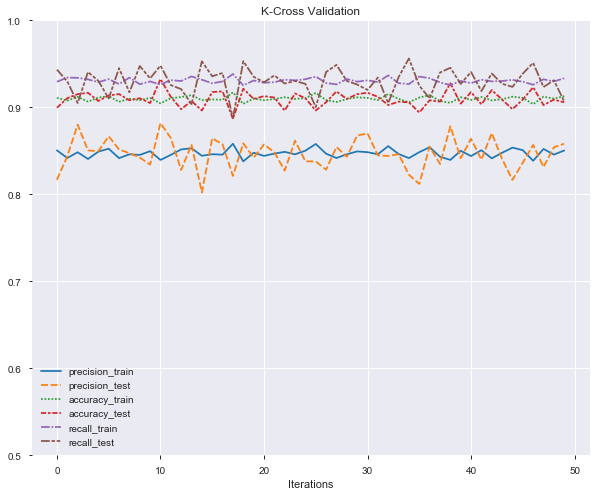

In [73]:
# viewing kcross in the graph
plt.figure(figsize = (10,8))
sns.lineplot(data = kcross)
plt.ylim(0.5,1)
plt.xlabel('Iterations')
plt.title('K-Cross Validation')
plt.show()

## 6.  Evaluating the model on the test Dataset <a id='VI'></a>

In [74]:
# Testing the model on the test data
y_test = df_test.pop('Converted')
X_test = df_test

In [75]:
# scaling the data using the scaler from the train_data
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])
X_test = X_test[X_train_final.columns]

In [76]:
# predicting the probabilities for X_train2
y_test_prob = res.predict(sm.add_constant(X_test))

test_pred = pd.DataFrame({'Converted_test': y_test, 'Converted_test_prob': y_test_prob})
test_pred['Converted_test_pred'] = test_pred['Converted_test_prob'].apply(lambda x: 1 if x > 0.2 else 0)

confusion_test = metrics.confusion_matrix(test_pred['Converted_test'], test_pred['Converted_test_pred'])
print(confusion_test)

[[1516  173]
 [  67  975]]


In [77]:
# precision score of test
precision_score_test = round(metrics.precision_score(test_pred['Converted_test'], test_pred['Converted_test_pred'])*100,2)

# recall score of test
recall_score_test = round(metrics.recall_score(test_pred['Converted_test'], test_pred['Converted_test_pred'])*100,2)

# accuracy score of test
accuracy_score_test = round(metrics.accuracy_score(test_pred['Converted_test'], test_pred['Converted_test_pred'])*100,2)

In [78]:
print('The precsion score for test is {}%'.format(precision_score_test))
print('The recall score for test is {}%'.format(recall_score_test))
print('The accuracy score for test is {}%'.format(accuracy_score_test))

The precsion score for test is 84.93%
The recall score for test is 93.57%
The accuracy score for test is 91.21%


**Inference : The above numbers are almost same as original and therefore the model is stable and can be utilized for lead scoring new leads**

## 7. Assigning lead score based on the features or parameters selected through logistic regression and Recommendations <a id='VII'></a>

In [79]:
X_train_final.columns

Index(['Total Time Spent on Website', 'Last Notable Activity_Modified',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Welingak Website', 'Last Activity_SMS Sent',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS',
       'Tags_Will revert after reading the email', 'Tags_edu_reasons',
       'Tags_phone_reasons'],
      dtype='object')

### 1. Interpretation of the model obtained through logistic regression and impact of various variables

In [80]:
# getting the coefficients for lead score 
logodds = ''

parameters = res.params

for i, j in parameters.items():
    j = str(round(j,1))
    logodds += " + " + i + ' X ' + '(' + j + ')'

In [81]:
# logodds p/(1-p) where p is probability for achieving conversion
logodds

' + const X (-0.9) + Total Time Spent on Website X (0.9) + Last Notable Activity_Modified X (-1.7) + Lead Source_Direct Traffic X (-0.9) + Lead Source_Google X (-0.5) + Lead Source_Welingak Website X (4.7) + Last Activity_SMS Sent X (2.0) + Tags_Closed by Horizzon X (7.1) + Tags_Lost to EINS X (6.5) + Tags_Will revert after reading the email X (4.6) + Tags_edu_reasons X (-2.1) + Tags_phone_reasons X (-3.5)'

In [82]:
# Understanding the importance and effect of paramter
odds_ratio = np.exp(parameters)

round(odds_ratio.sort_values(),2)

Tags_phone_reasons                             0.03
Tags_edu_reasons                               0.12
Last Notable Activity_Modified                 0.18
const                                          0.40
Lead Source_Direct Traffic                     0.41
Lead Source_Google                             0.58
Total Time Spent on Website                    2.53
Last Activity_SMS Sent                         7.20
Tags_Will revert after reading the email     103.05
Lead Source_Welingak Website                 106.50
Tags_Lost to EINS                            667.56
Tags_Closed by Horizzon                     1253.09
dtype: float64

**Inferences:**

1. Odds_ratio is the probability of conversion/Probability of not conversion

2. Odds_ratio of more than 1 indicates variable has positive effect on the model and higher the odd_ratio higher the positive effect or probability/score
 
3. From the above we see that these variables have positive impact -  Total Time Spent on Website, Activity_SMS Sent, Tags_Will revert after reading the email, Lead Source_Welingak Website, Tags_Lost to EINS, Tags_Closed by Horizzon 

4. Negative impact on probability by these variables: Tags_phone_reasons, Tags_edu_reasons, Last Notable Activity_Modified, Lead Source_Google    

### 2. Leads score formula for each lead and cut-off to identify as hot lead

In [83]:
from IPython.display import Markdown, display
def printmd(string, color=None):
    colorstr = "<span style='color:{}'>{}</span>".format(color, string)
    display(Markdown(colorstr))
    
# getting logodds and converting into probability
# multiplying with 100 to get Lead_Score
printmd("**Lead_Score = exp(logodds)/(1+exp(logodds)) X 100**", color = "blue")

<span style='color:blue'>**Lead_Score = exp(logodds)/(1+exp(logodds)) X 100**</span>

**Inferences and conclusion :**

1. The relation ship between logodds, probability is monotonous which means as the log odds increases probability increases

2. As the coefficient increases the logodds increases. Therefore, probability of achieving conversion also increases

3. Which means higher the coefficient higher the variable impacts the lead into conversion or hot lead

We can use the one of these two methods for obtaining Lead Score for new/existing leads**
    
 **1. `Lead_Score` formula (indicated above)**
 
 **2. Use the `res model` (logistic regression model) for predicting probability and multiplying by 100**
 
 **3. `20 (probability 0.2)` can be considered cut-off for lead score which achieves 85% conversion rate(precision) and 93.5% recall (leads captured through the model), accuracy_score (91%)** 

### 3. Feature importance using Random Forrest Classifier

In [84]:
#lets make a copy of our original dataset
data_rfc = leads_final.copy()

In [85]:
# lets fit the features(variables) and labels(target) of our dataset to the random forest classifier model 
rf = RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_leaf=4, max_features=0.5, random_state=2019)
rf.fit(data_rfc.drop(['Converted'],axis=1), data_rfc.Converted)
features = data_rfc.drop(['Converted'],axis=1).columns.values

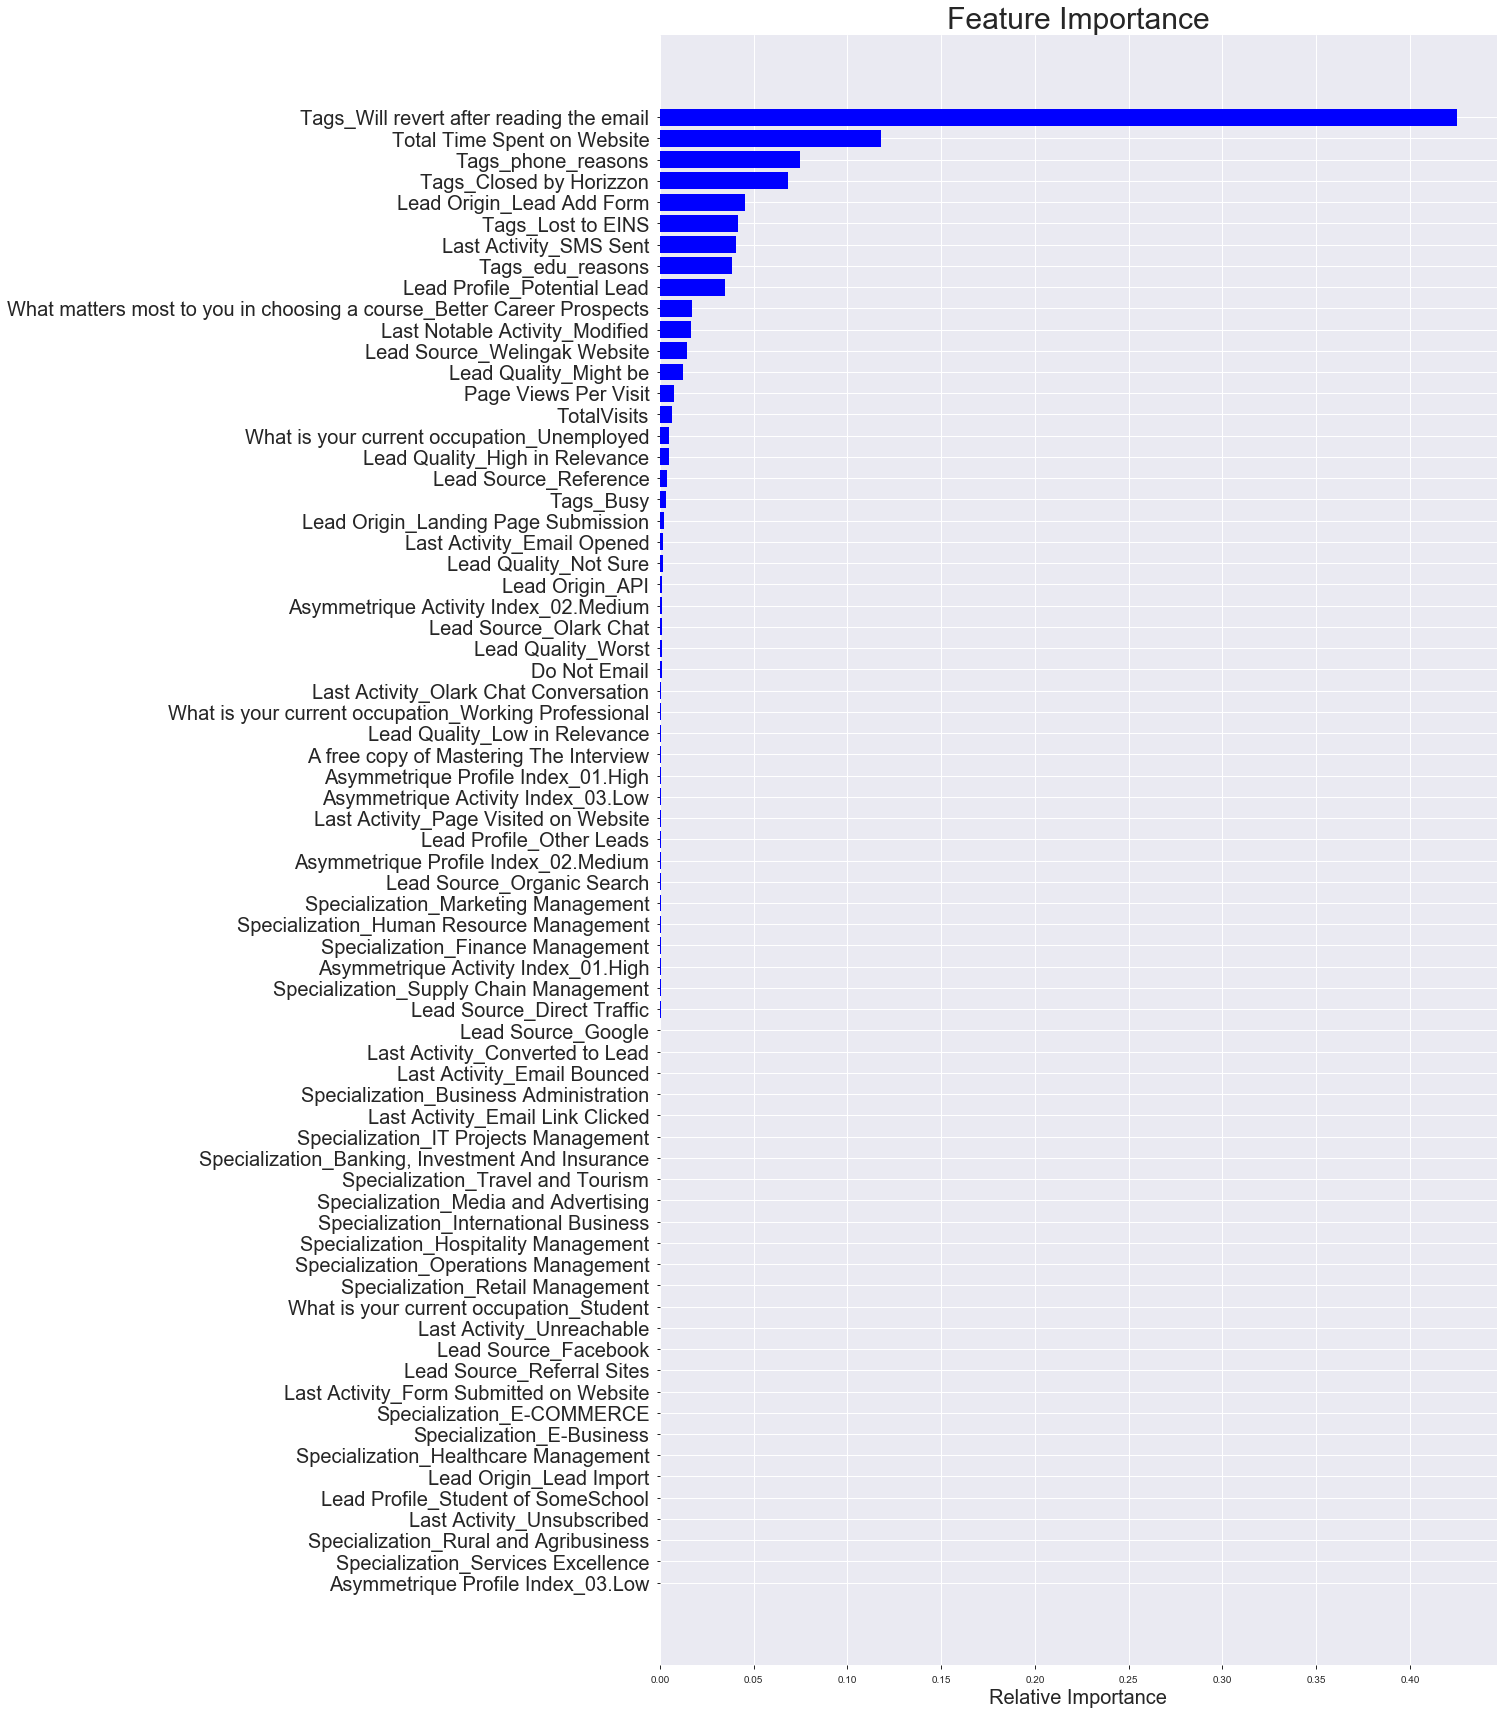

In [86]:
# lets plot the relative importance of each variable as statistically identified by the random forest classifier
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(15, 30))
plt.title('Feature Importance', fontsize=30)
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices], fontsize=20)
plt.xlabel('Relative Importance', fontsize=20)
plt.show()

**Important features that can effect conversion rate are**
1. Tags: Will revert after reading the email, Lost to EINS, Closed by Horizzon have high positive impact on the conversion rate where as phone_reasons, edu_reasons are strong negative indicators.
2. Total Time Spent on Website: Visitors who spend more time on the website are more likely to convert.
3. Lead_Source: Direct traffic as well as traffic from Google has strong negative effect on conversion rate. Although most of the traffic is direct and via Google but the conversion rate is only 30-40%. Where as leads from Welingak Website has substantial count as well as conversion rate.
4. Last Activity: If Modified, the conversion rate is around 20% and its a negative sign where as SMS Sent has substantial count and conversion rate of around 65%.
5. Other important features are: Lead Origin_Lead Add Form, Lead Profile_Potential Lead, What matters most to you in choosing a course_Better Career Prospects, and Page Views Per Visit.

**-----End----**
********